# Методы машинного обучения. 
## ЛР4. – Наивный байесовский классификатор.
Осуществить исследование исходных данных. Решить задачу классификации с использованием наивного байесовского классификатора, основанного на принципе максимума апостериорной вероятности. В качестве исходных данных можно использовать таблицу «Ирисов Фишера» (можно какой-то свой датасет). 
В рамках исследования исходных данных:
- Построить гистограммы распределения значений для каждого признака и для каждого класса.
- Произвести визуализацию проекций классов на плоскости, где по осям  отложены различные комбинации пар признаков.
- Построить матрицы корреляций между различными признаками, как для всей выборки в целом, так и для отдельных классов.
- Построить наивный байесовский классификатор.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.


![подпись](img/img.jpg)

Вероятностная модель для наивного байесовского классификатора:
\begin{equation}
P(A | B) = \frac{P(A) * P(B | A)}{P(B)}
\end{equation}


По другому можно записать так:
\begin{equation}
posterior = \frac{prior * likelihood}{evidence}
\end{equation}
где
- posterior — вероятность гипотезы A при наступлении события B
- prior — априорная вероятность гипотезы A
- likelihood — вероятность наступления события B при истинности гипотезы A
- evidence — полная вероятность наступления события B

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
# Загрузка данных
df = pd.read_csv('data/mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [17]:
df.shape

(8124, 23)

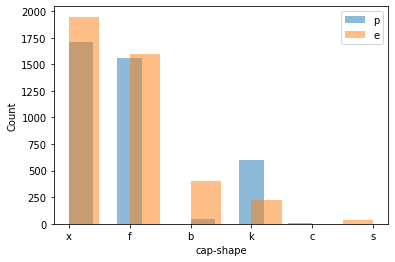

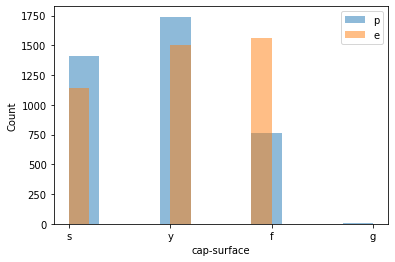

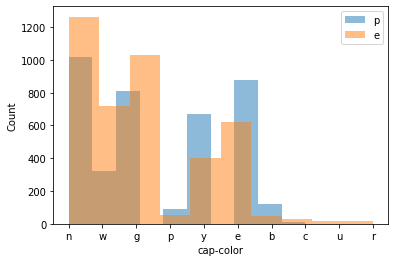

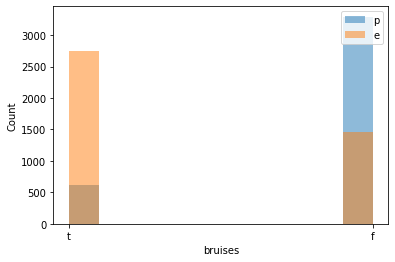

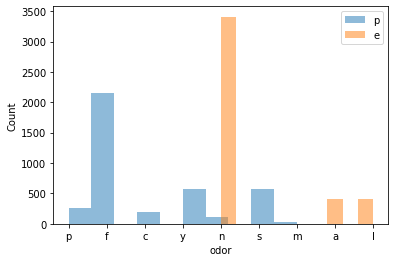

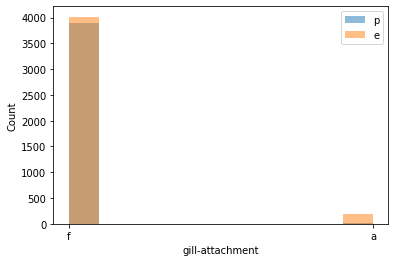

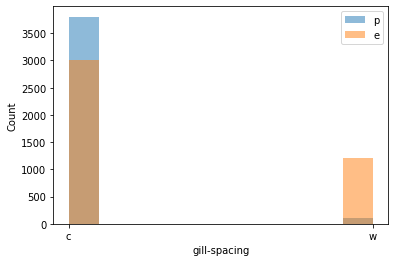

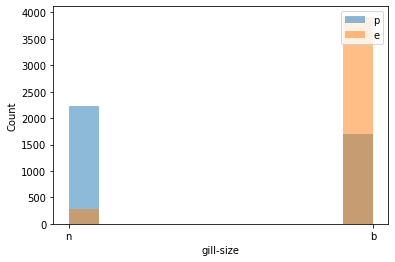

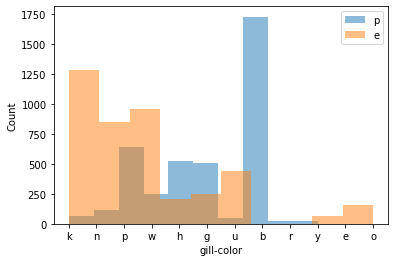

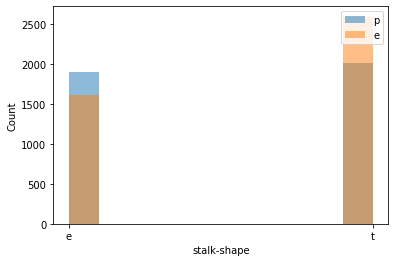

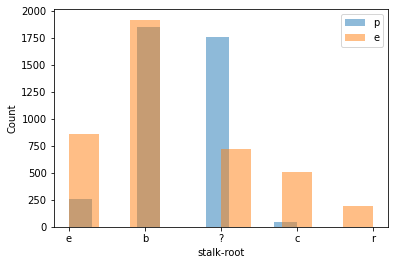

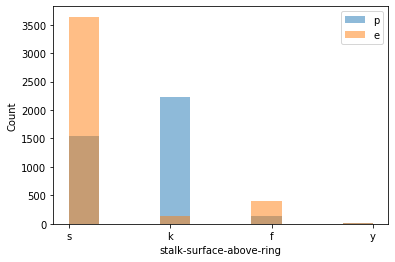

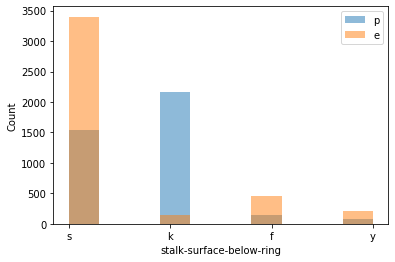

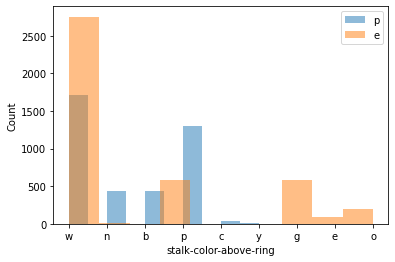

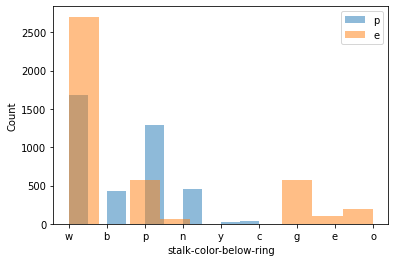

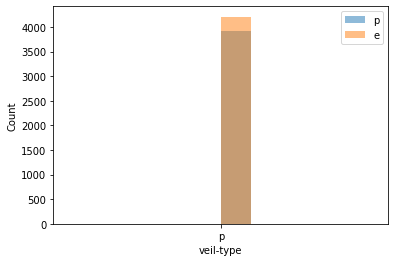

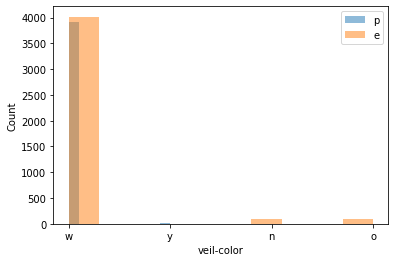

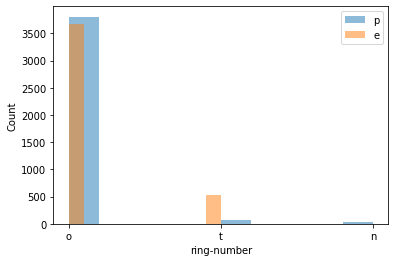

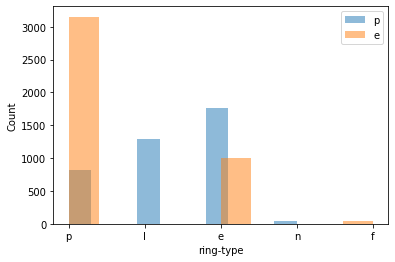

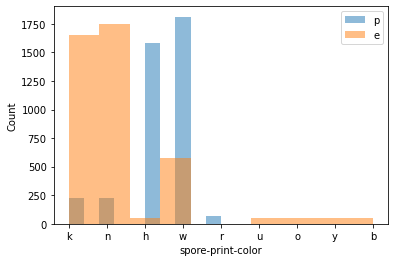

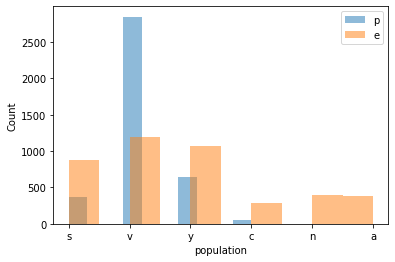

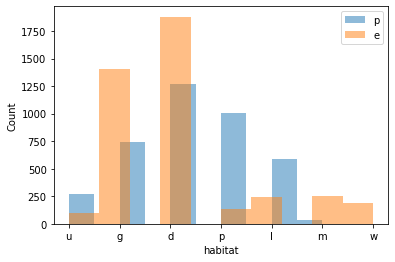

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# построение гистограмм для каждого признака и каждого класса
for column in df.columns[1:]:
    
    # гистограмма для каждого класса
    for label in df['class'].unique():
        plt.hist(df[column][df['class']==label], alpha=0.5, label=label)
    
    # настройки графика
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()

In [19]:
encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)

df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [20]:
# Now we will calculate the correlation coefficient for each feature
df.corr()

class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
stalk-surface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
stalk-color-above-ring   -0.154003  -0.031659     0.066050   0.002364   
stalk-color-below-ring   -0.146730  -0.030390     0.068885   0.008057   
veil-type                      NaN        NaN          NaN        NaN   
veil-color                0.145142   0.072560    -0.016603   0.036130   
ring-number              -0.214366  -0.106534    -0.026147  -0.005822   
ring-type                -0.411771  -0.025457    -0.106407   0.162513   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   

                           bruises      odor  gill-attachment  gill-spacing  \
class                    -0.501530 -0.093552         0.129200     -0.348387   
cap-shape                -0.035374 -0.021935         0.078865      0.013196   
cap-surface               0.070228  0.045233        -0.034180     -0.282306   
cap-color                -0.000764 -0.387121         0.041436      0.144259   
bruises                   1.000000 -0.061825         0.137359     -0.299473   
odor                     -0.061825  1.000000        -0.059590      0.063936   
gill-attachment           0.137359 -0.059590         1.000000      0.071489   
gill-spacing             -0.299473  0.063936         0.071489      1.000000   
gill-size                -0.369596  0.310495         0.108984     -0.108333   
gill-color                0.527120 -0.129213        -0.128567      0.100193   
stalk-shape               0.099364  0.459766         0.186485      0.080895   
stalk-root                0.244188 -0.205215         0.144063      0.350548   
stalk-surface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
stalk-surface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
stalk-color-above-ring    0.083538  0.174532         0.099299      0.274574   
stalk-color-below-ring    0.092874  0.169407         0.097160      0.253505   
veil-type                      NaN       NaN              NaN           NaN   
veil-color                0.119770 -0.057747         0.897518      0.073363   
ring-number               0.056788  0.111905         0.093236      0.243014   
ring-type                 0.692973 -0.281387        -0.146689     -0.195897   
spore-print-color        -0.285008  0.469055        -0.029524      0.047323   
population                0.088137 -0.043623         0.165575     -0.529253   
habitat                  -0.075095 -0.026610        -0.030304     -0.154680   

                          gill-size  gill-color  ...  \
class                      0.540024   -0.530566  ...   
cap-shape                  0.054050   -0.006039  ...   
cap-surface                0.208100   -0.161017  ...   
cap-color                 -0.169464    0.084659  ...   
bruises                   -0.369596    0.527120  ...   
odor                       0.310495   -0.12

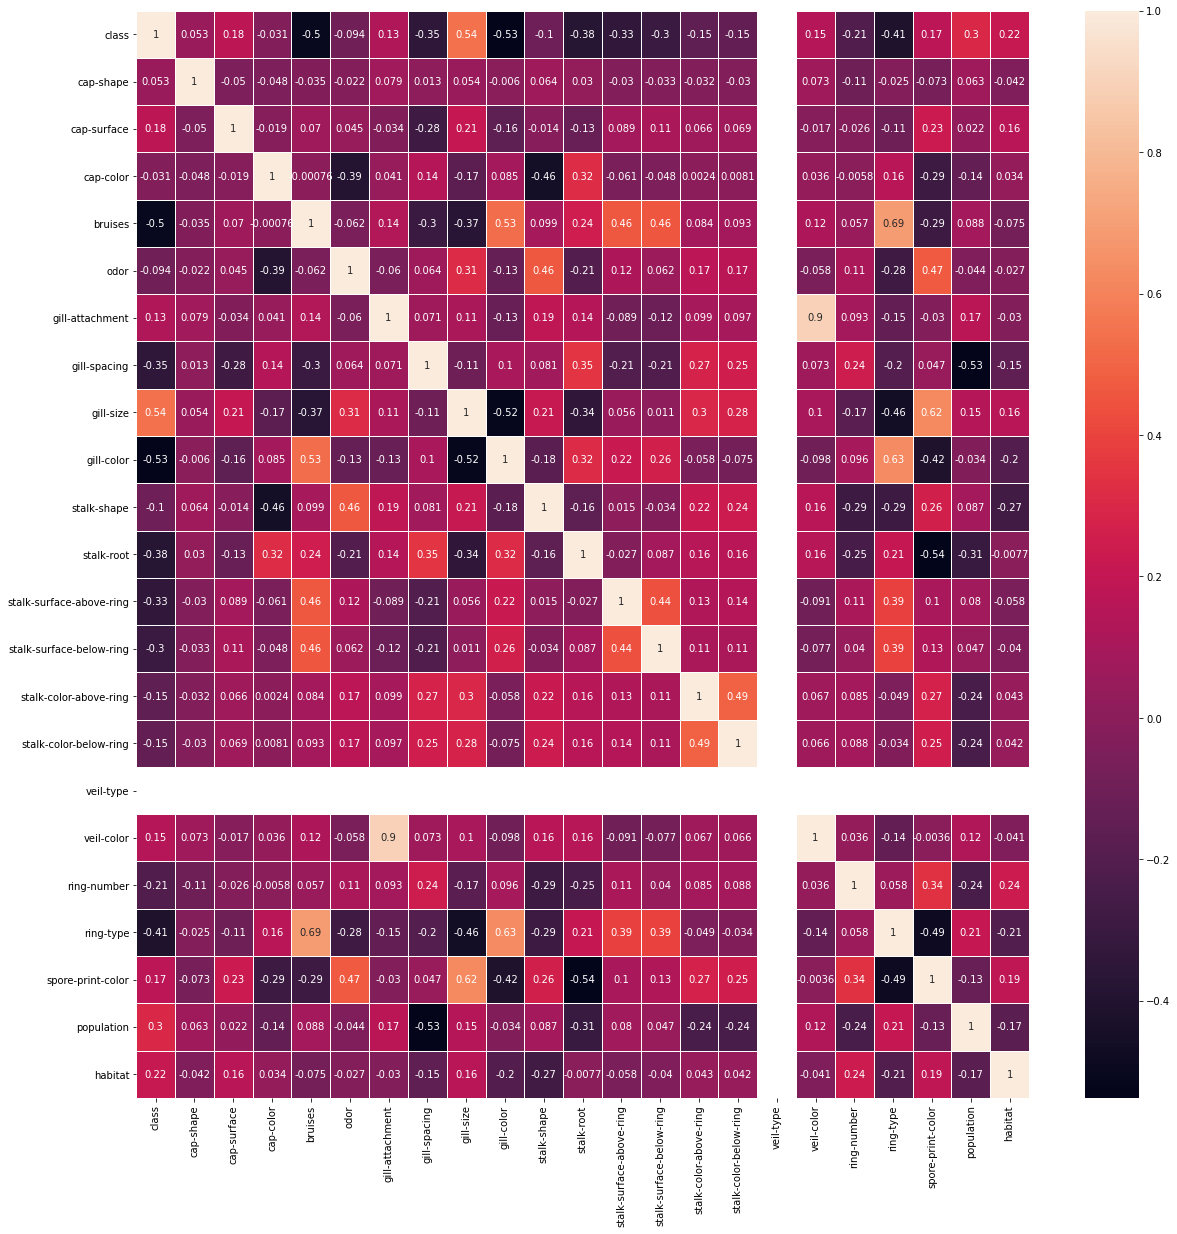

In [21]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [22]:
# Here we have deleted one of the columns that has no connection with the rest of the data.
df.drop(['veil-type'], axis=1, inplace=True)

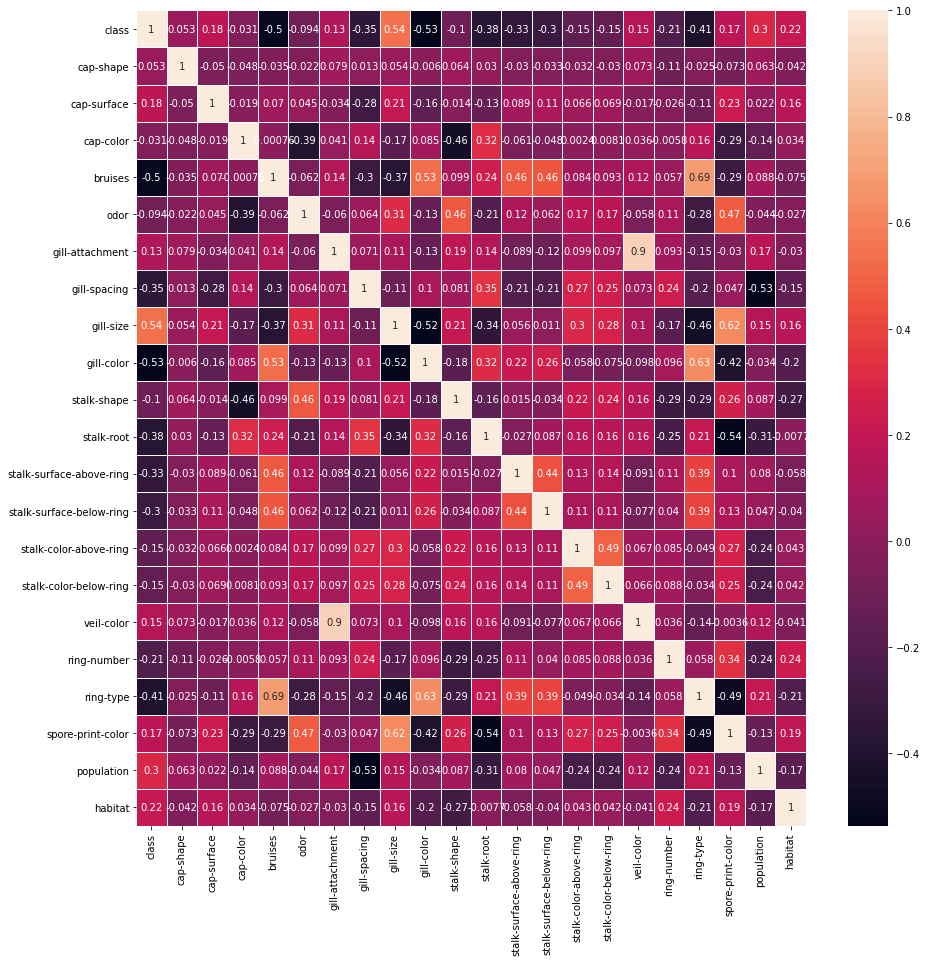

In [23]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [24]:
# Here we get the top 5 characteristics of the target "class" that affect the algorithm.
corr_1=df.corr()
most_eff=corr_1.nlargest(5,"class")
most_eff

class  cap-shape  cap-surface  cap-color   bruises      odor  \
class        1.000000   0.052951     0.178446  -0.031384 -0.501530 -0.093552   
gill-size    0.540024   0.054050     0.208100  -0.169464 -0.369596  0.310495   
population   0.298686   0.063413     0.021555  -0.144770  0.088137 -0.043623   
habitat      0.217179  -0.042221     0.163887   0.033925 -0.075095 -0.026610   
cap-surface  0.178446  -0.050454     1.000000  -0.019402  0.070228  0.045233   

             gill-attachment  gill-spacing  gill-size  gill-color  ...  \
class               0.129200     -0.348387   0.540024   -0.530566  ...   
gill-size           0.108984     -0.108333   1.000000   -0.516736  ...   
population          0.165575     -0.529253   0.147682   -0.034090  ...   
habitat            -0.030304     -0.154680   0.161418   -0.202972  ...   
cap-surface        -0.034180     -0.282306   0.208100   -0.161017  ...   

             stalk-surface-above-ring  stalk-surface-below-ring  \
class                       -0.334593                 -0.298801   
gill-size                    0.056310                  0.010894   
population                   0.079604                  0.046797   
habitat                     -0.058076                 -0.039628   
cap-surface                  0.089090                  0.107965   

             stalk-color-above-ring  stalk-color-below-ring  veil-color  \
class                     -0.154003               -0.146730    0.145142   
gill-size                  0.296548                0.278708    0.103809   
population                -0.240261               -0.242792    0.124924   
habitat                    0.042561                0.041594   -0.040581   
cap-surface                0.066050                0.068885   -0.016603   

             ring-number  ring-type  spore-print-color  population   habitat  
class          -0.214366  -0.411771           0.171961    0.298686  0.217179  
gill-size      -0.171362  -0.460872           0.622991    0.147682  0.161418  
population     -0.242020   0.211763          -0.126859    1.000000 -0.174529  
habitat         0.235835  -0.212080           0.185954   -0.174529  1.000000  
cap-surface    -0.026147  -0.106407           0.230364    0.021555  0.163887  

[5 rows x 22 columns]

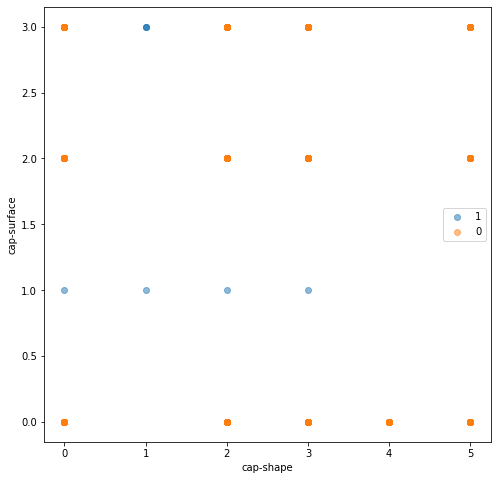

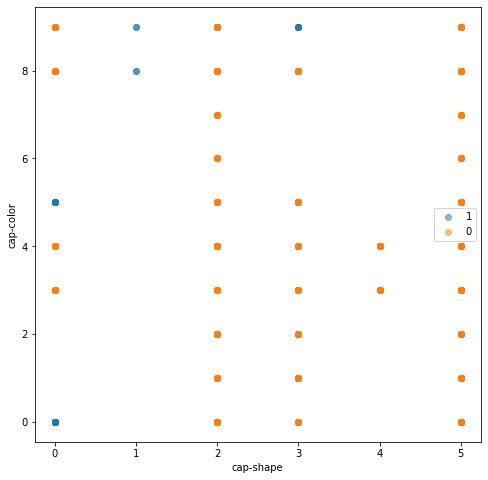

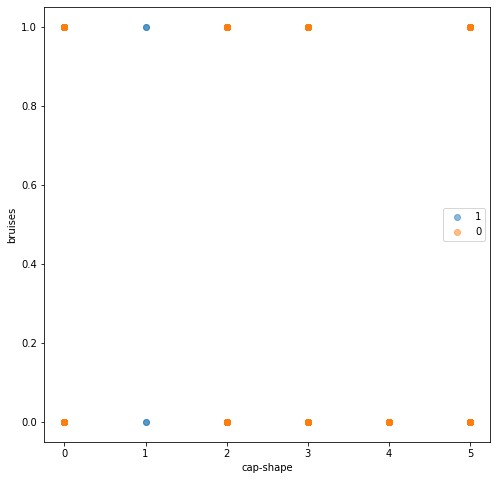

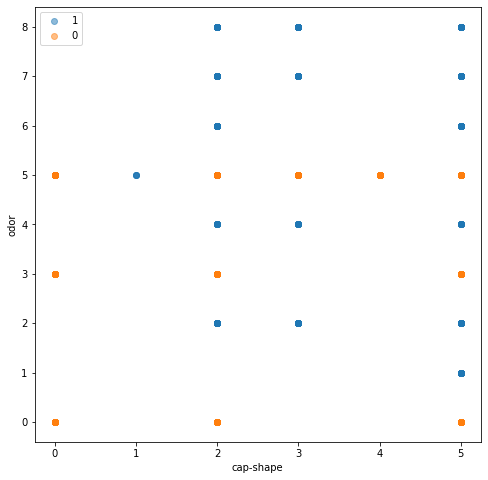

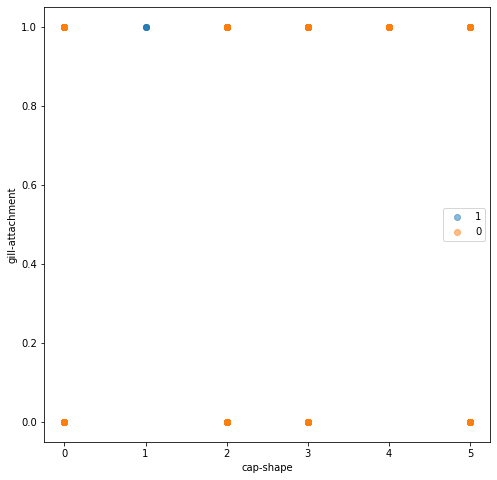

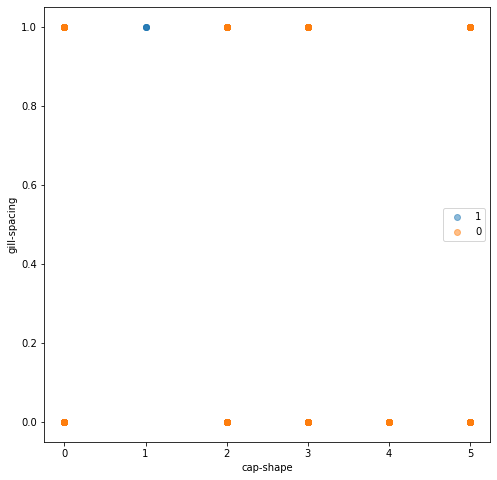

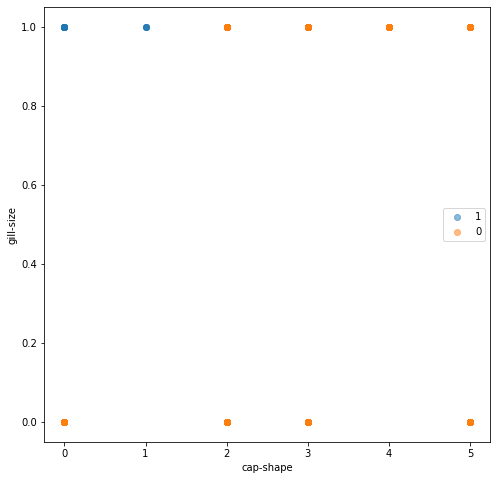

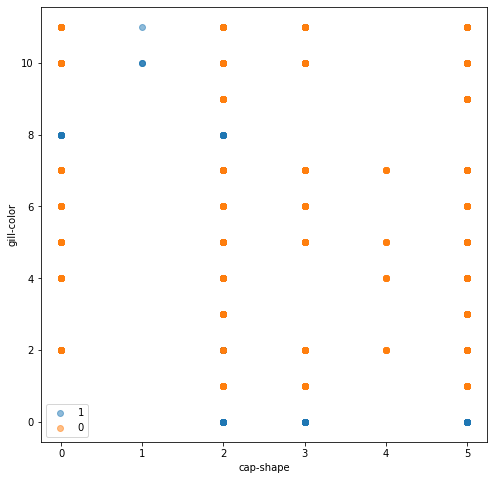

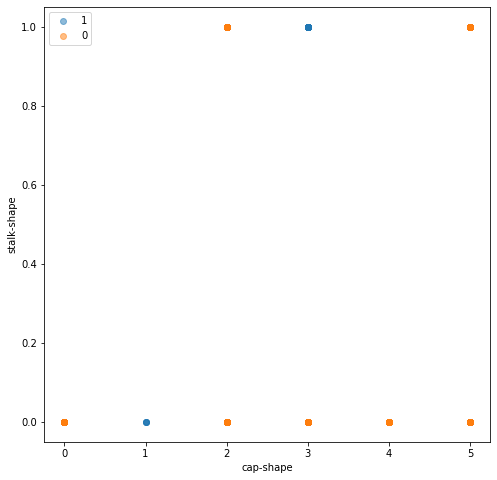

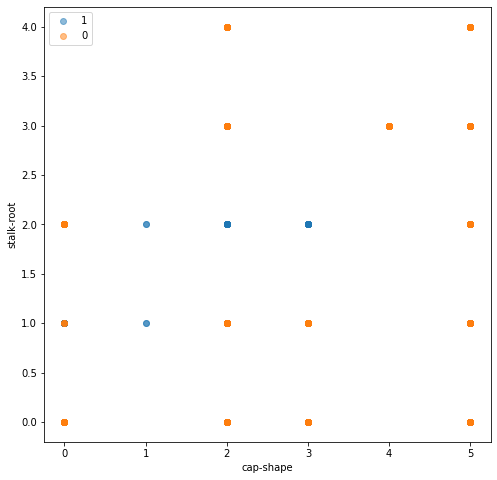

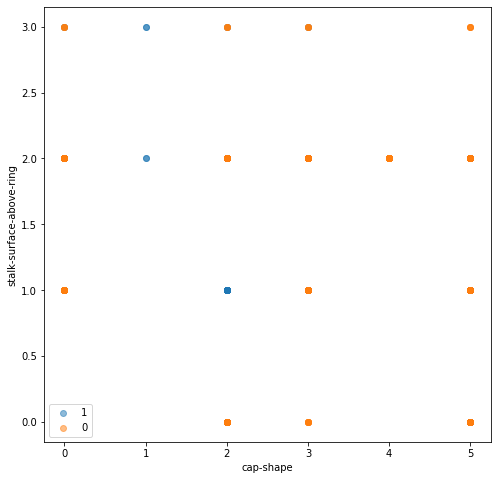

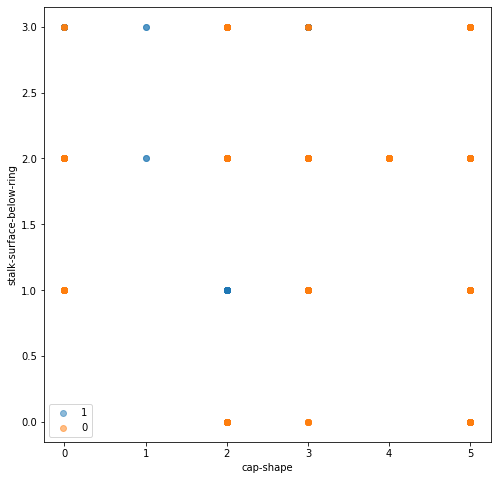

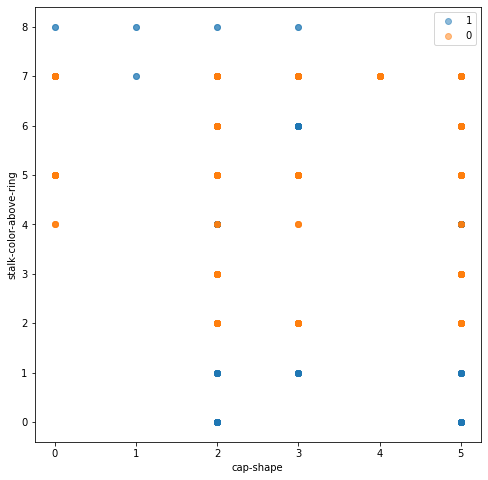

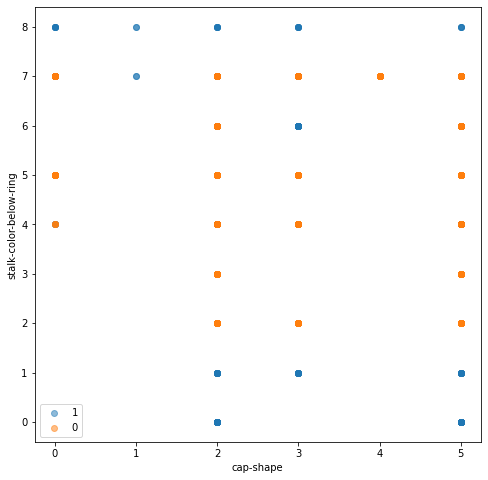

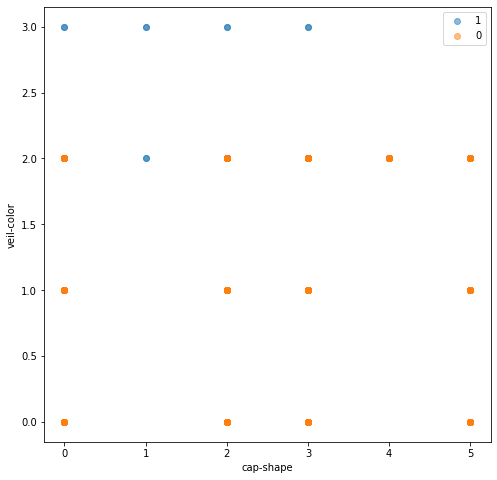

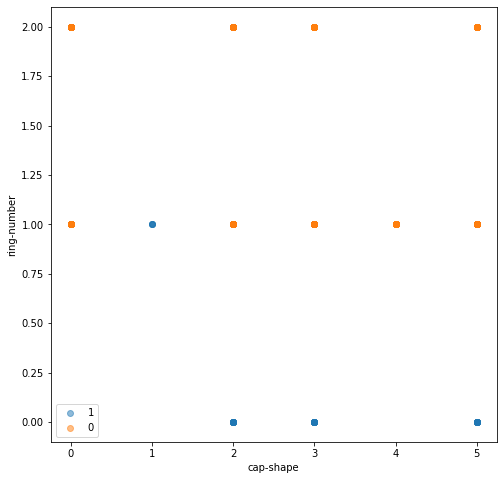

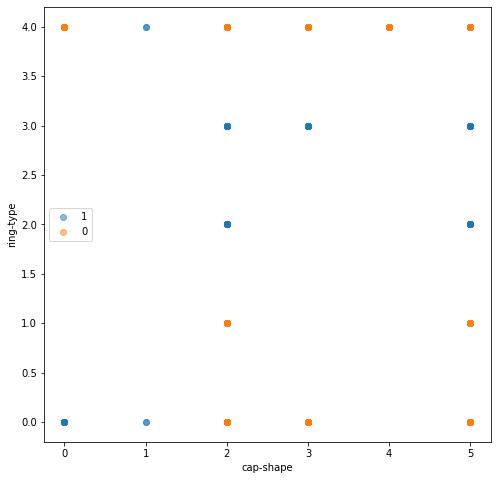

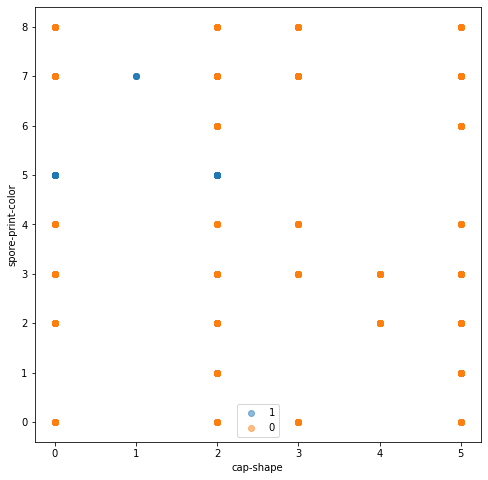

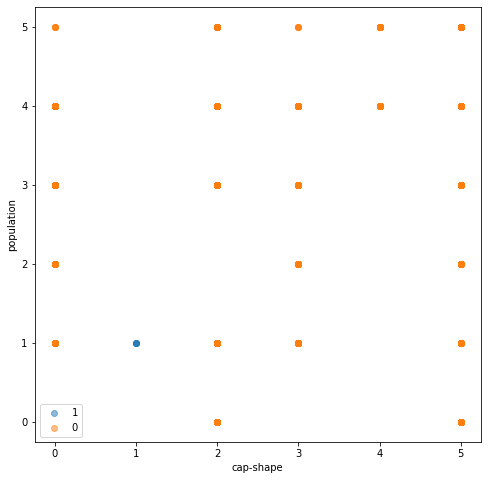

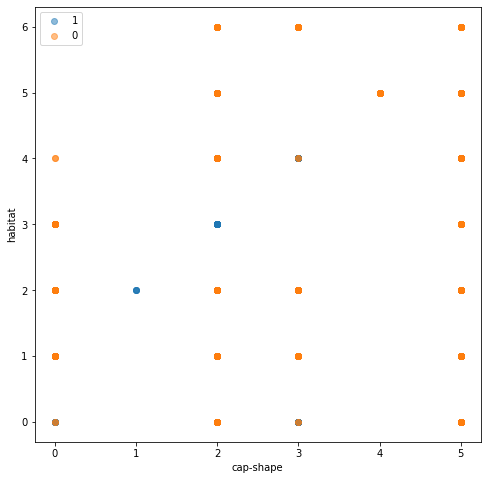

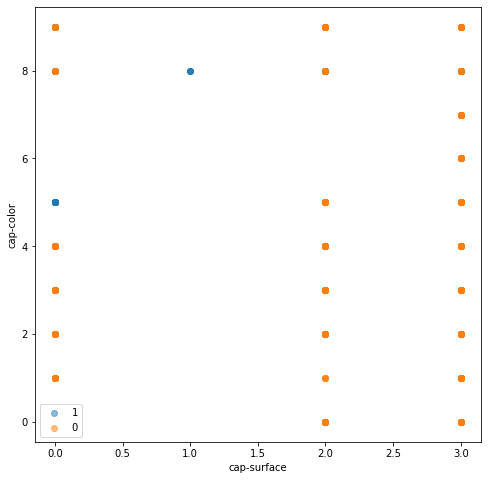

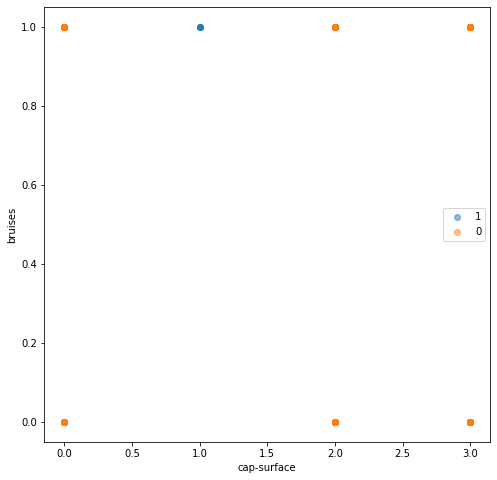

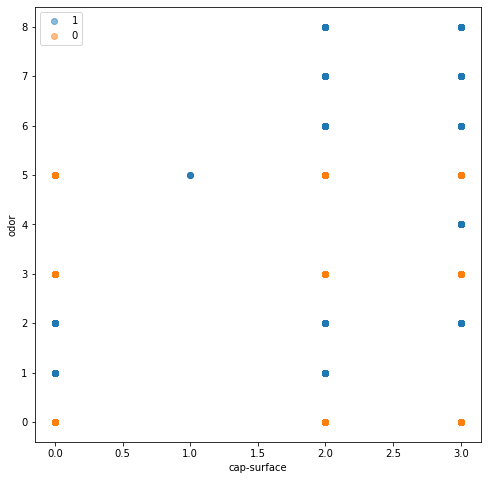

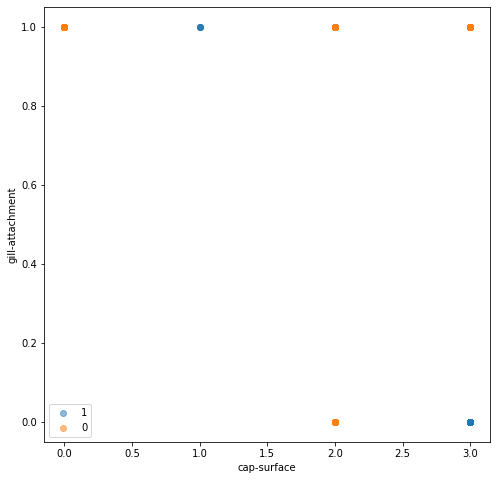

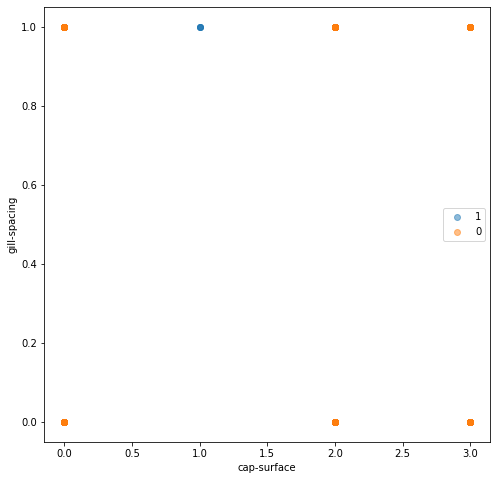

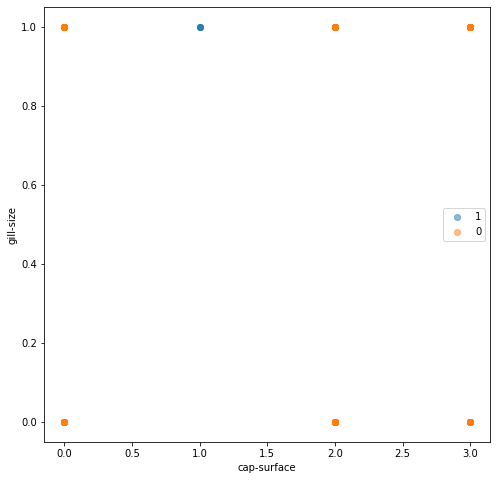

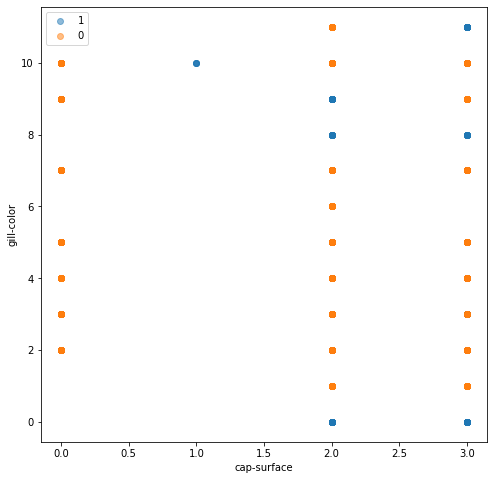

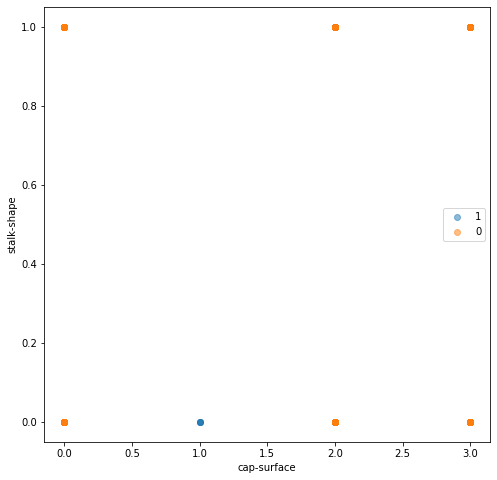

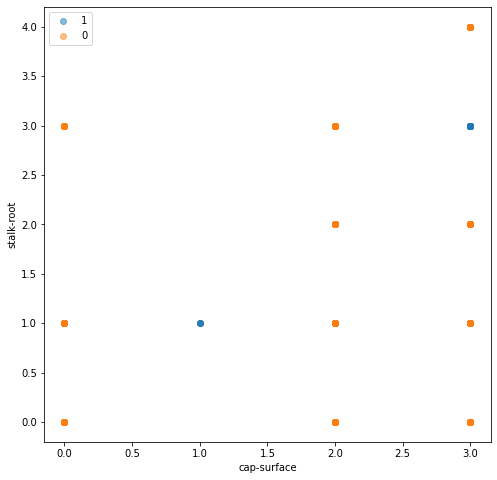

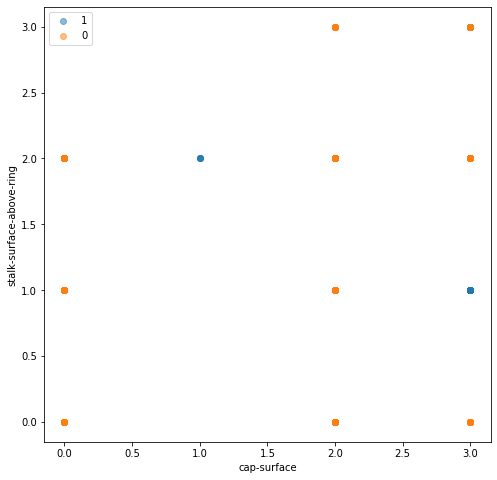

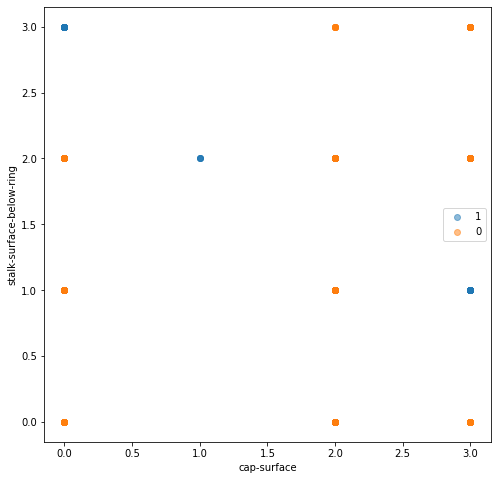

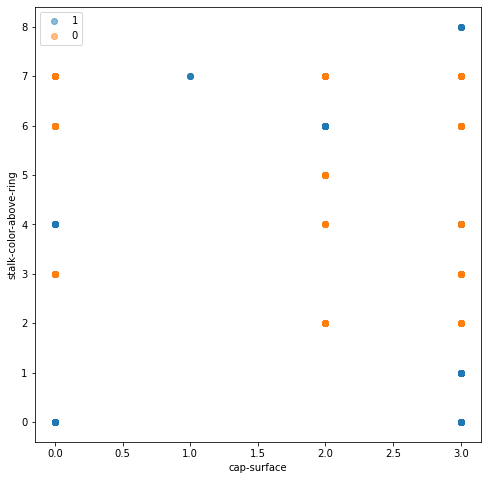

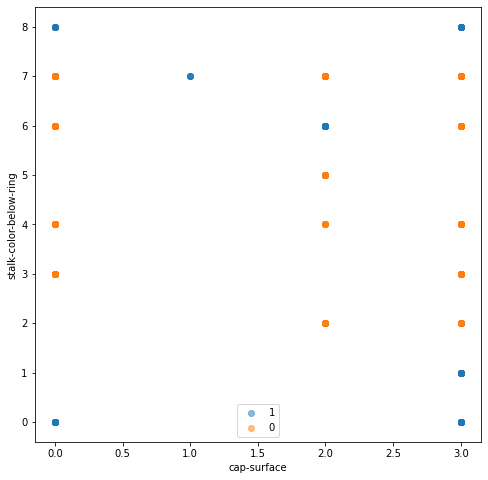

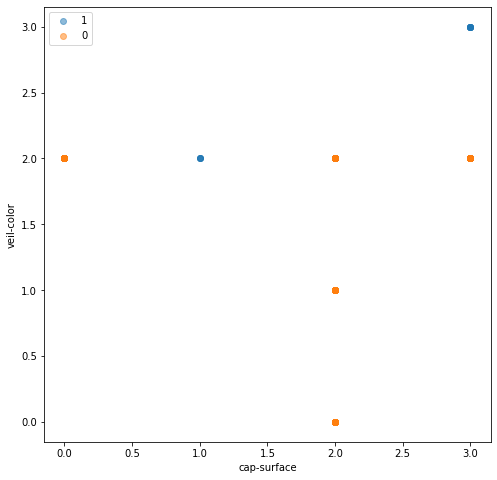

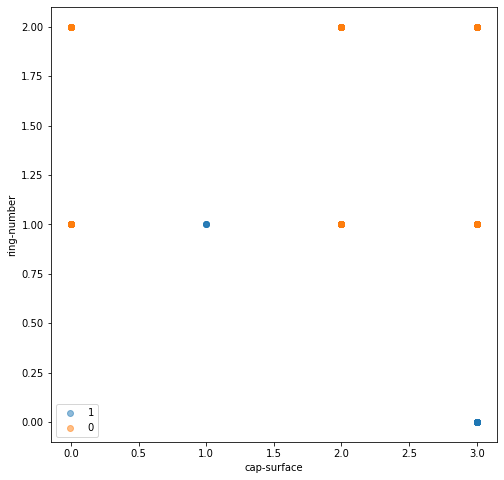

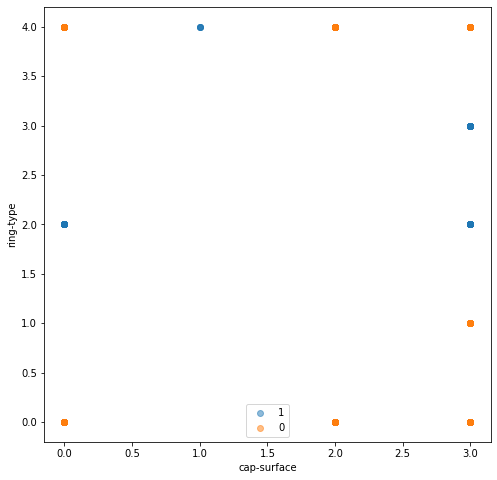

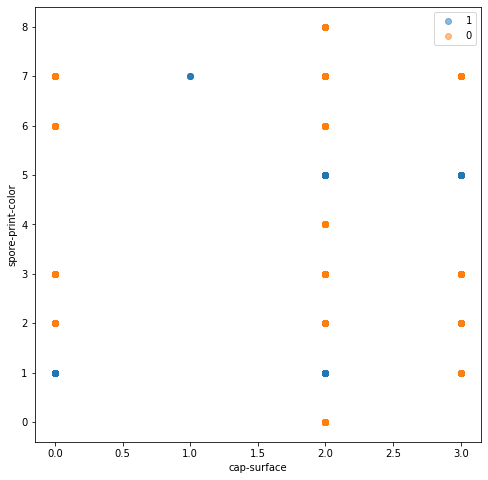

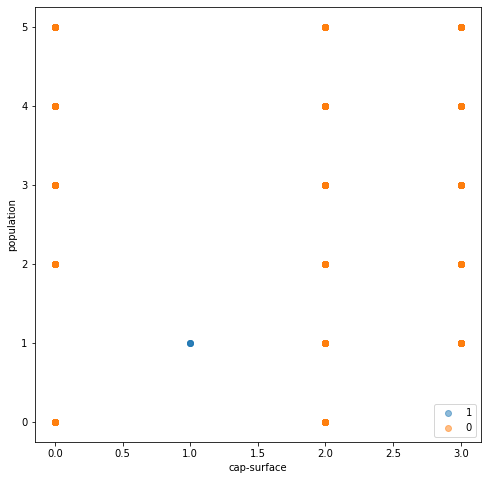

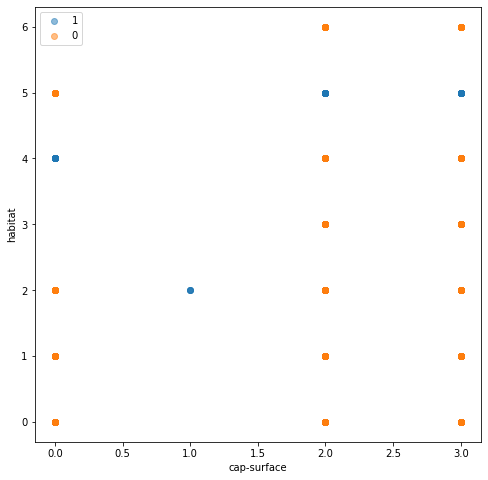

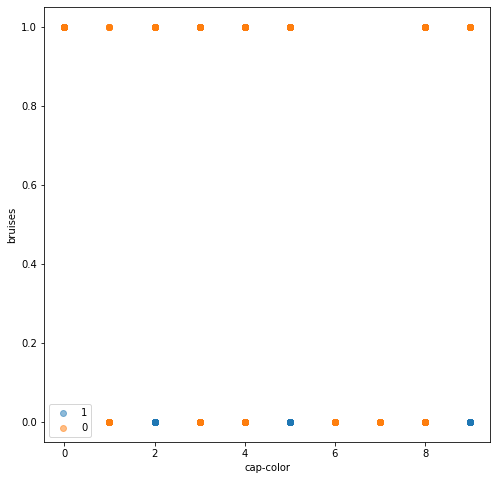

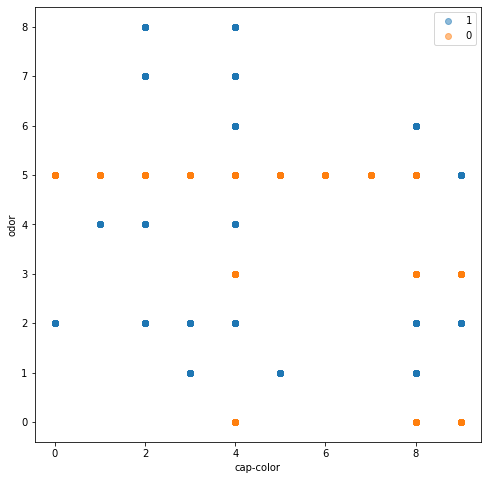

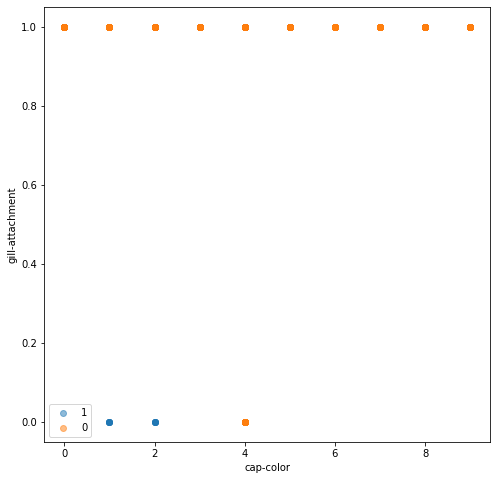

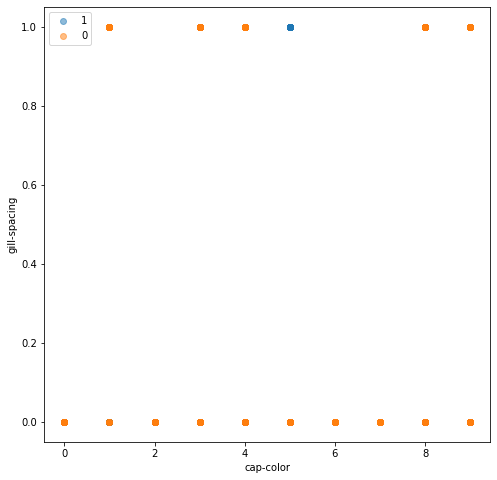

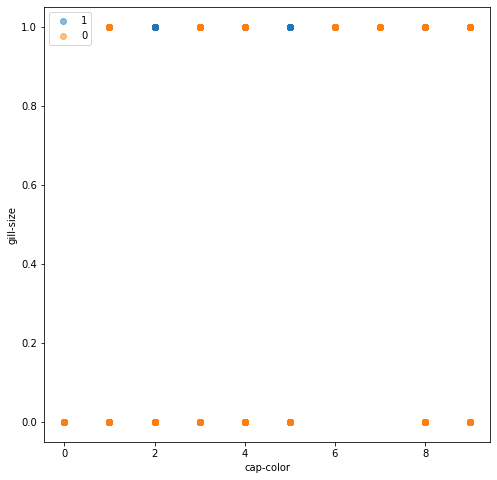

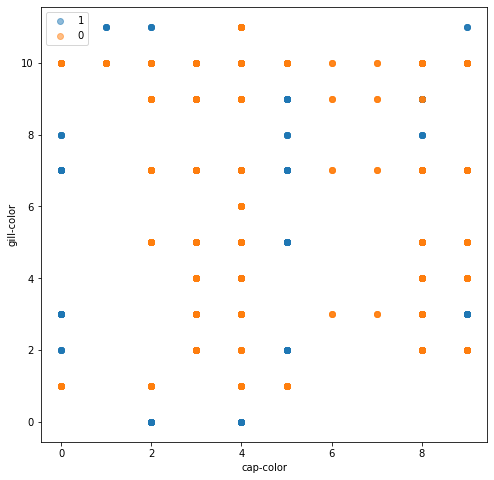

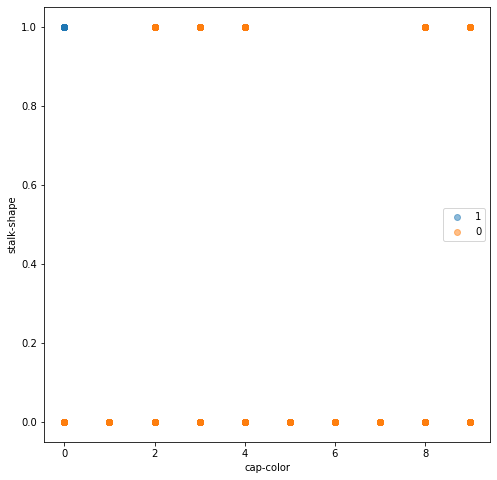

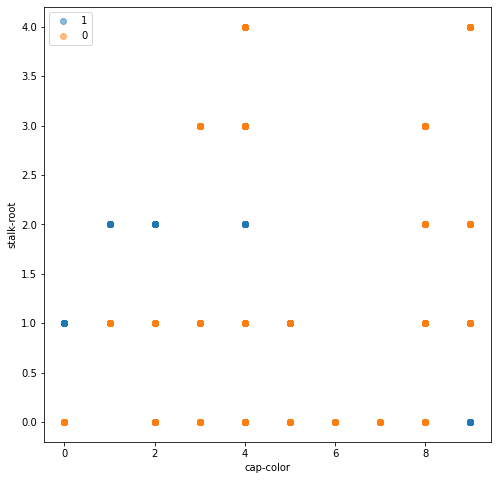

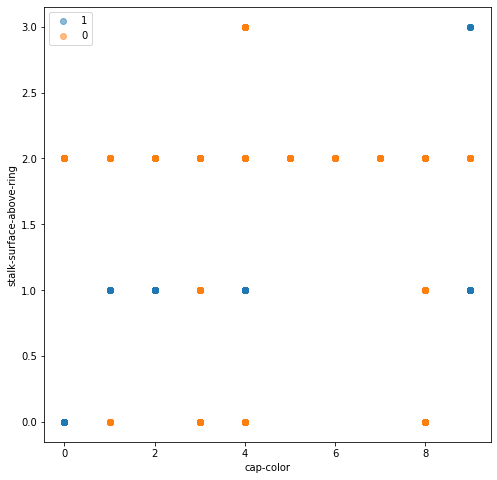

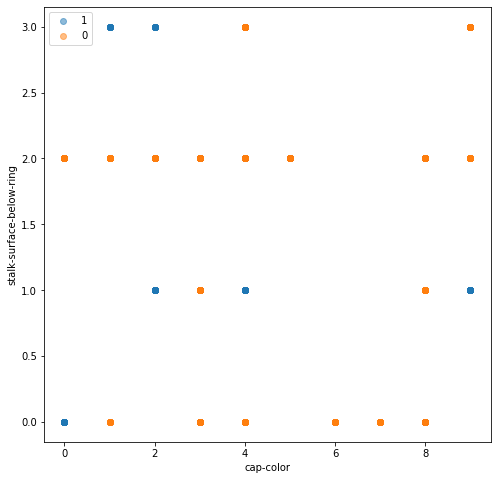

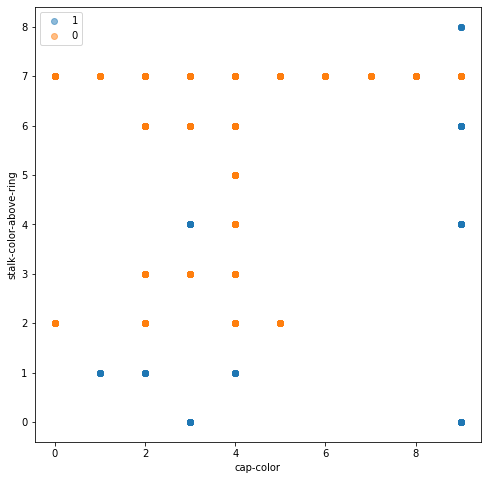

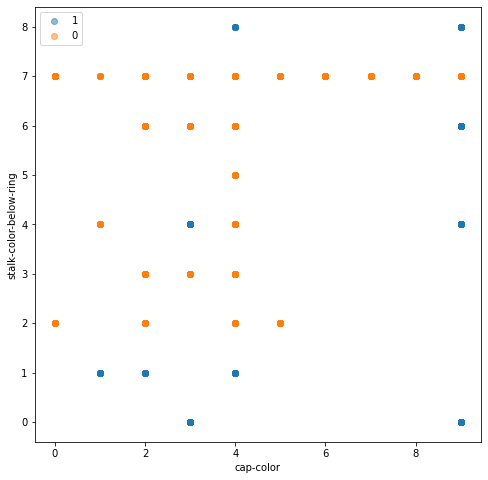

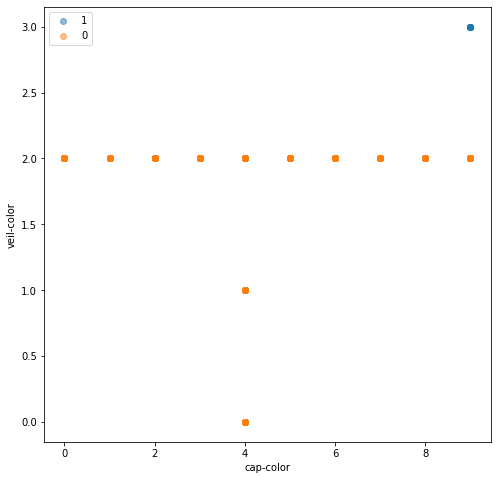

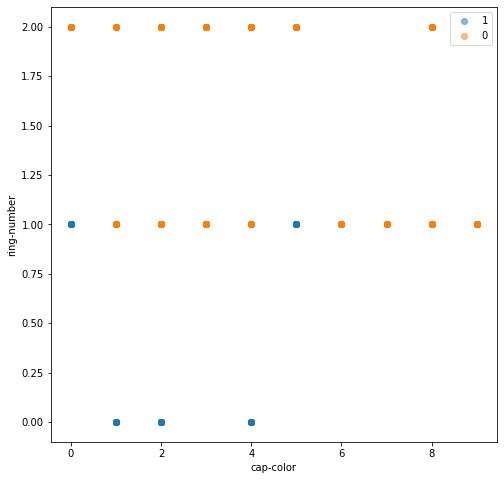

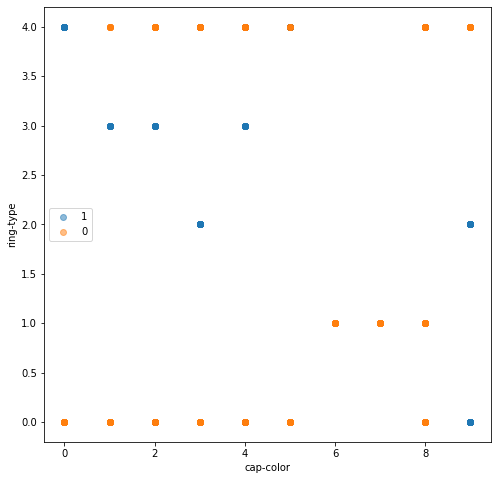

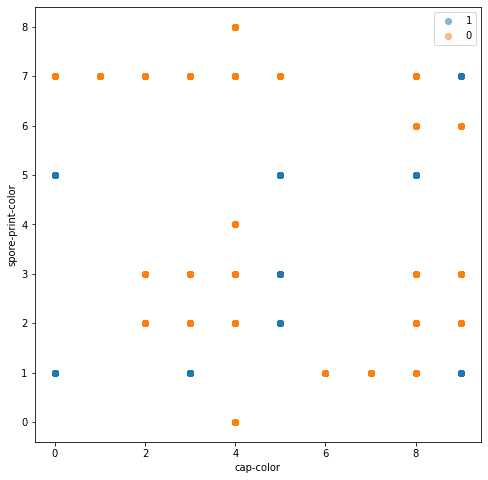

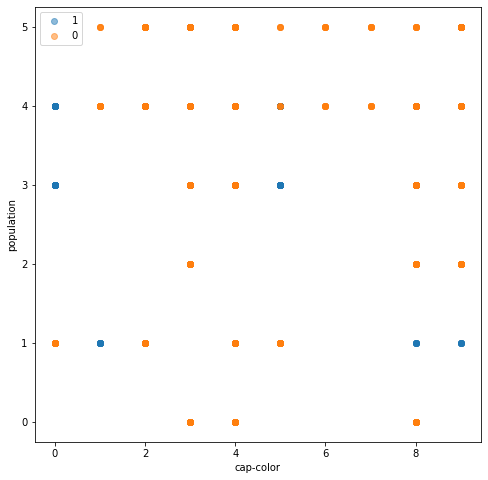

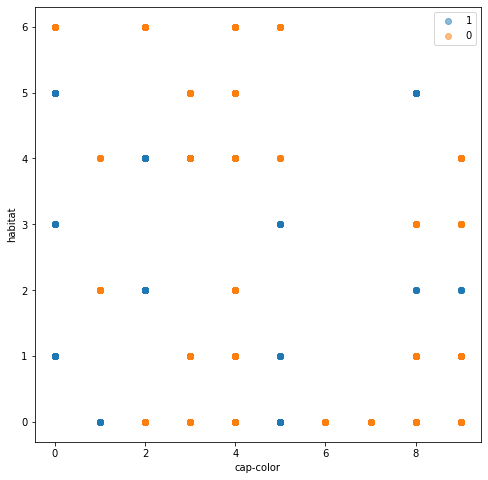

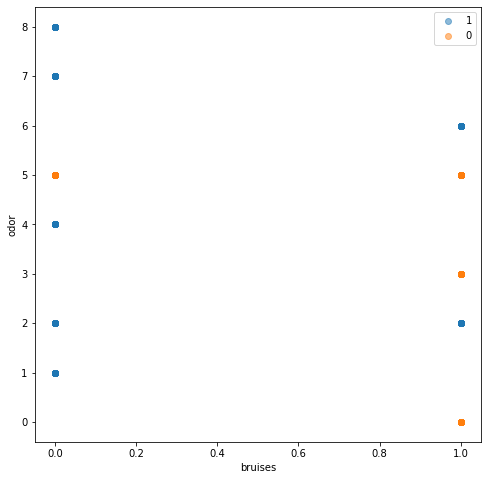

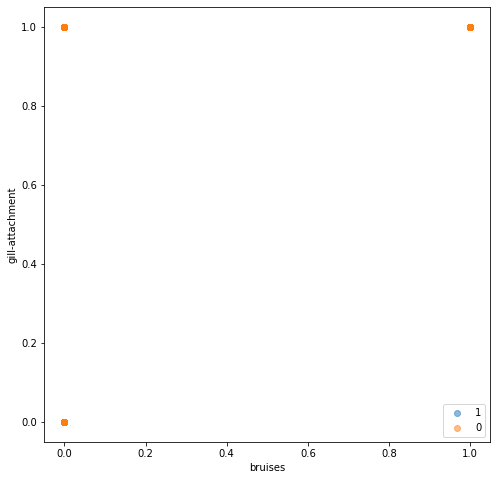

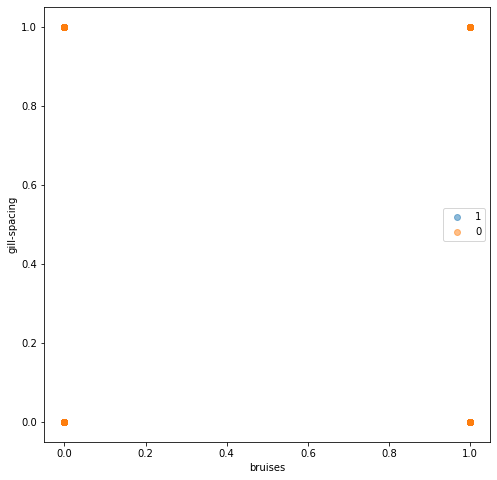

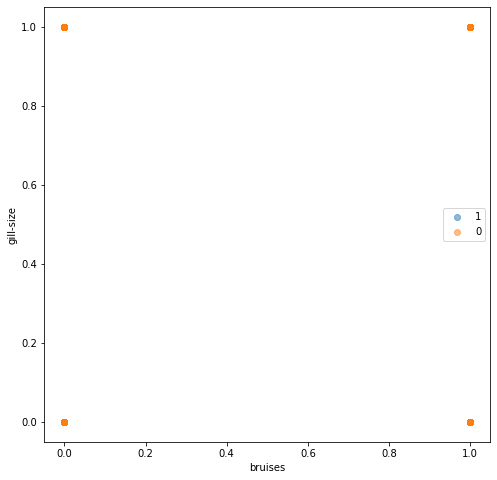

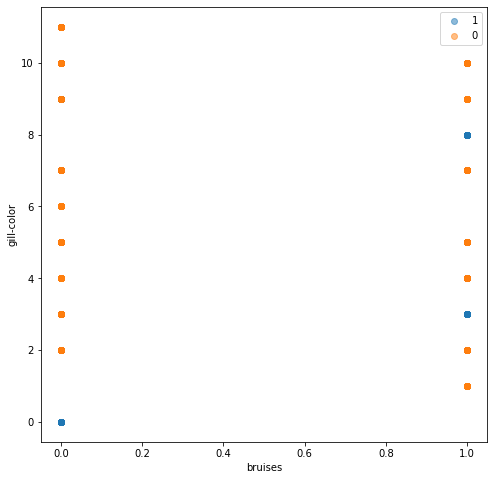

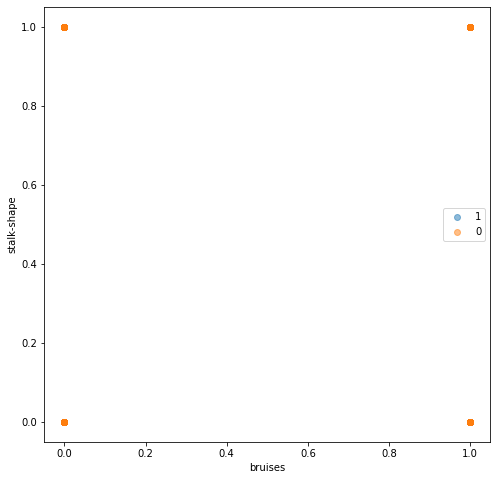

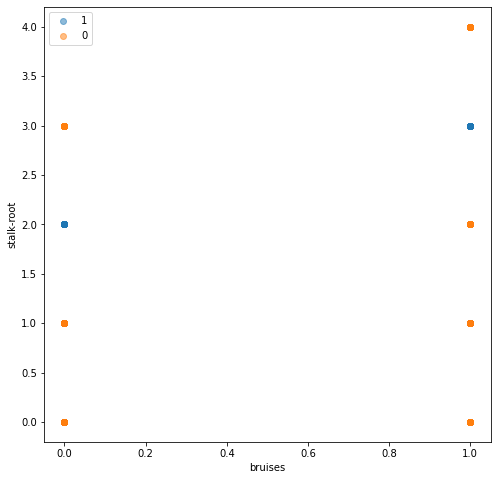

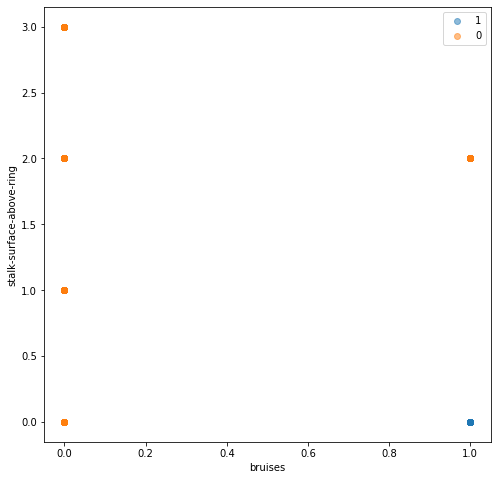

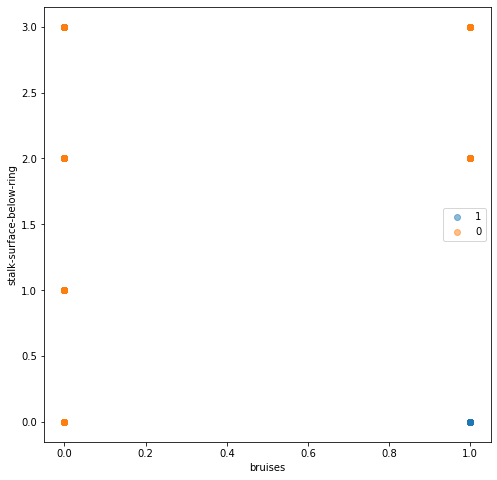

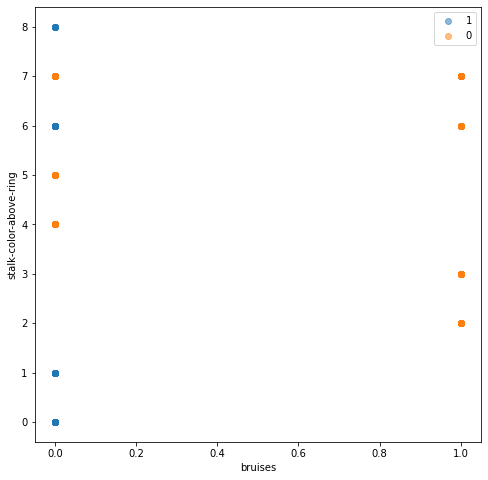

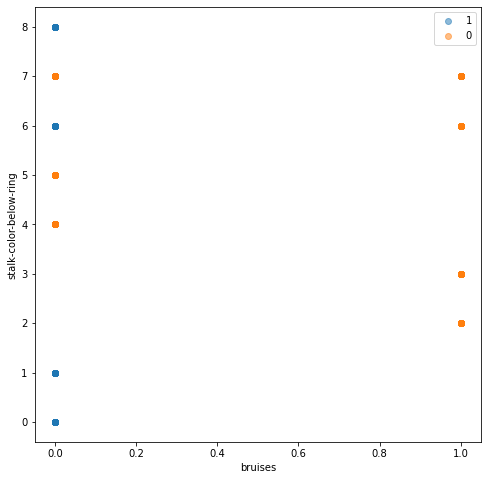

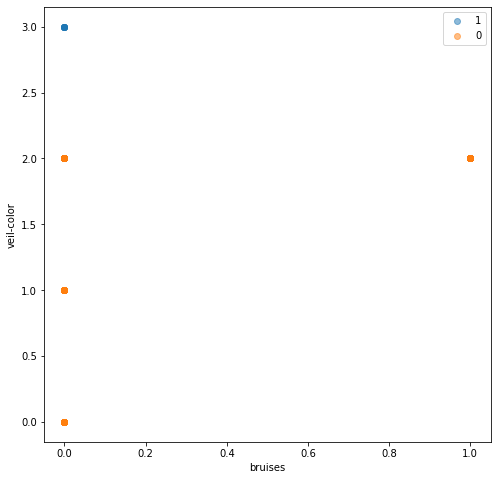

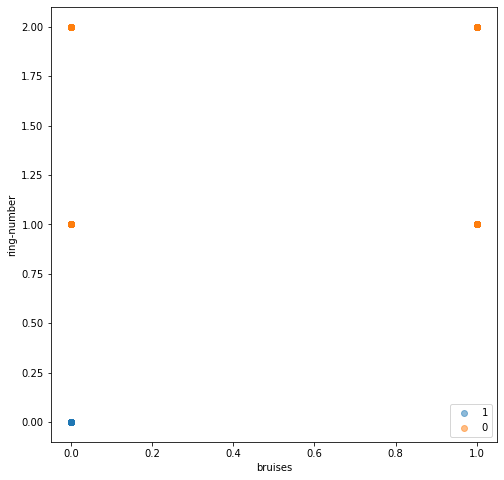

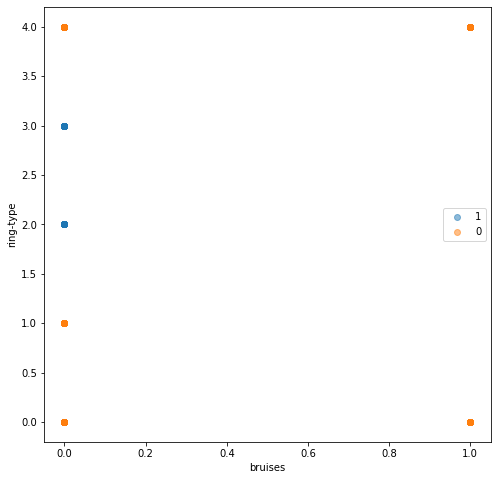

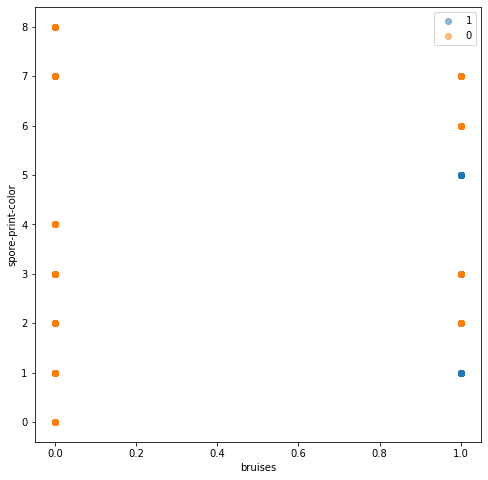

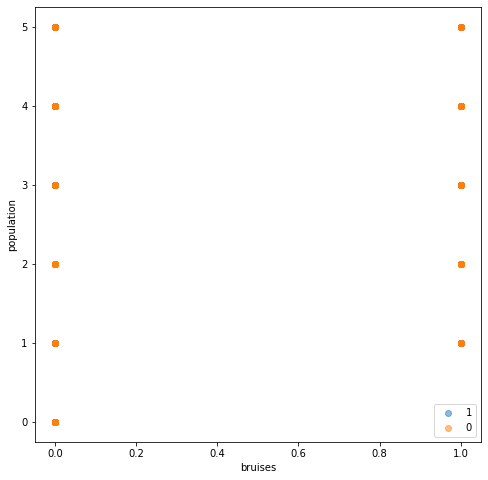

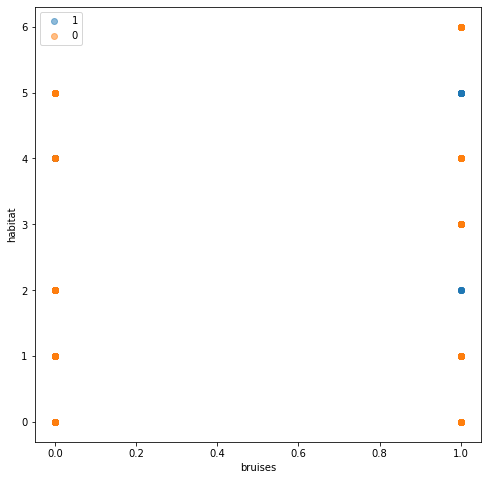

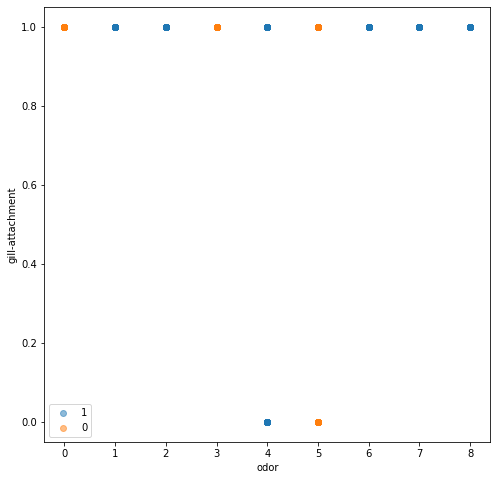

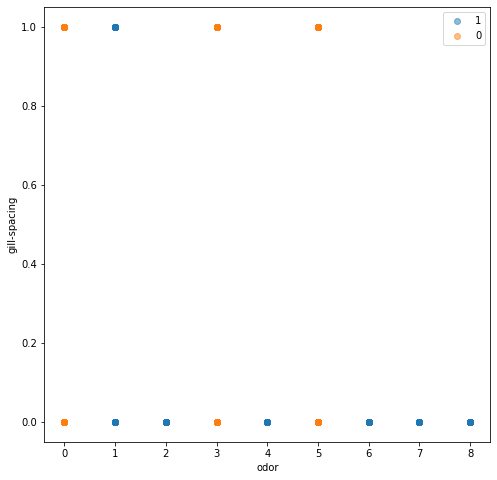

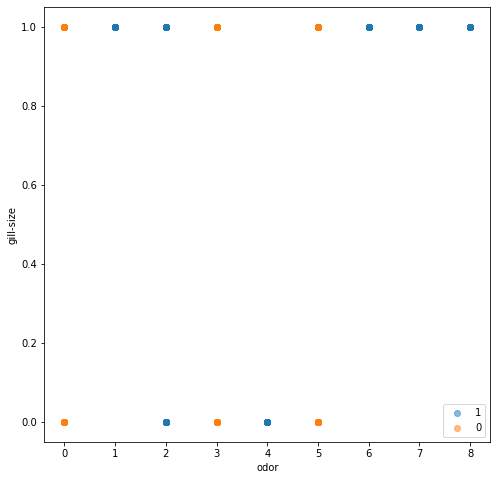

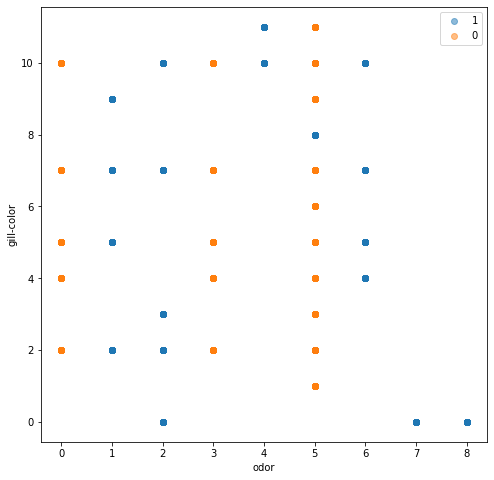

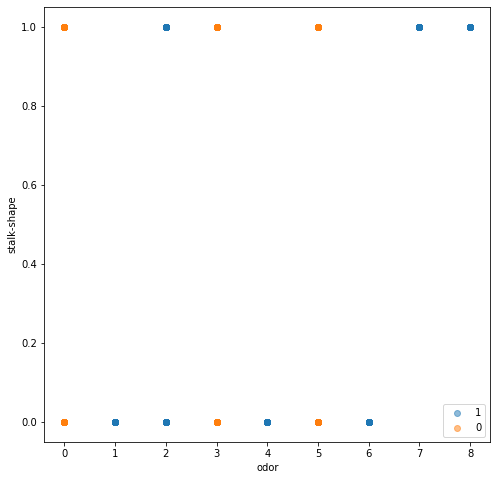

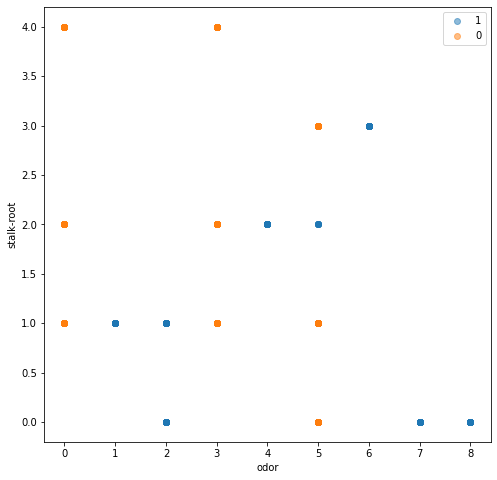

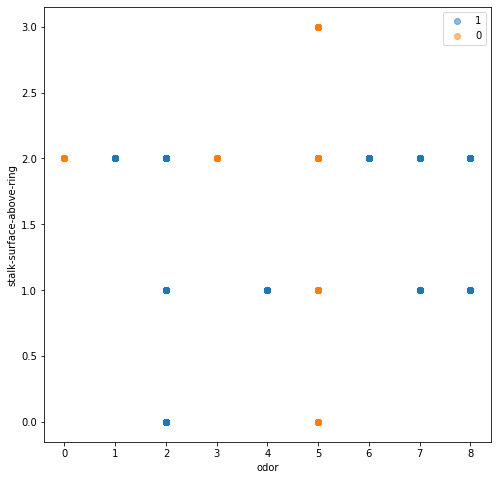

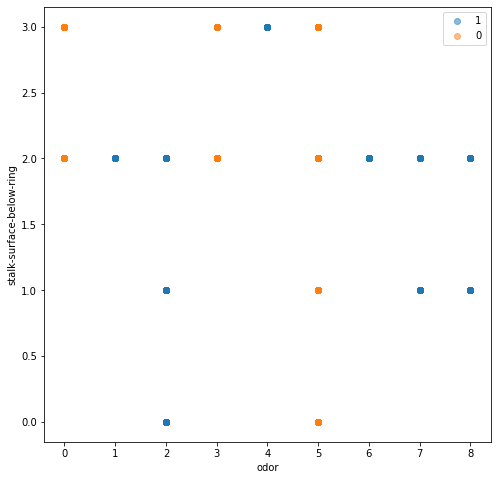

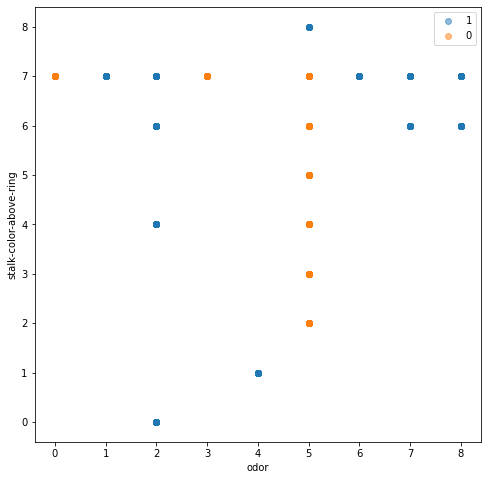

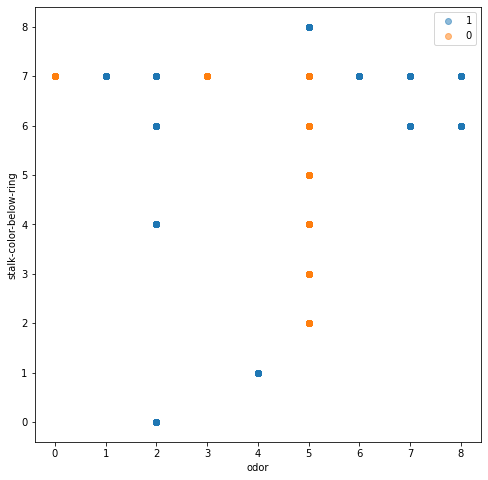

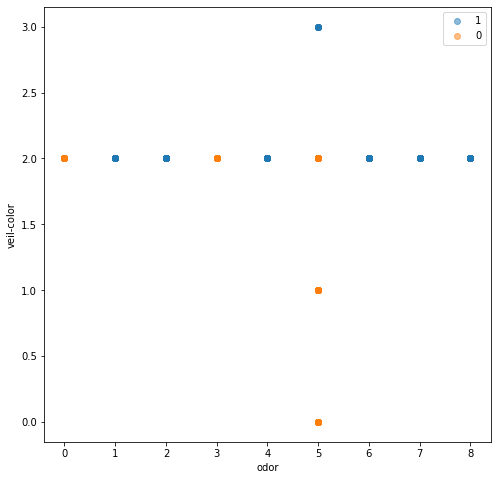

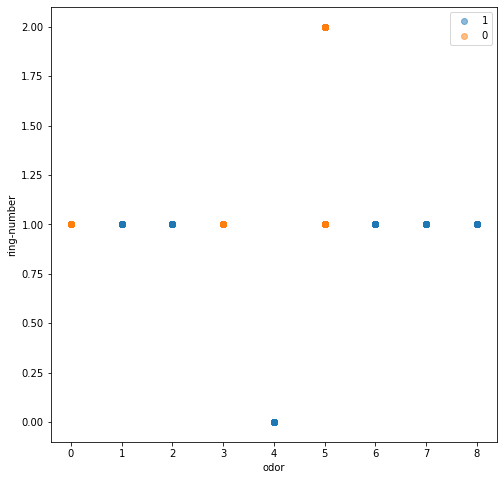

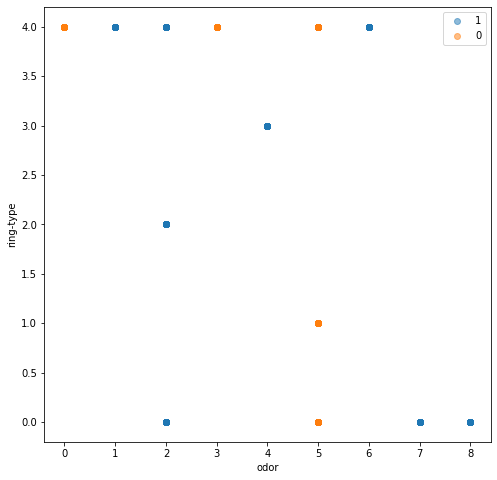

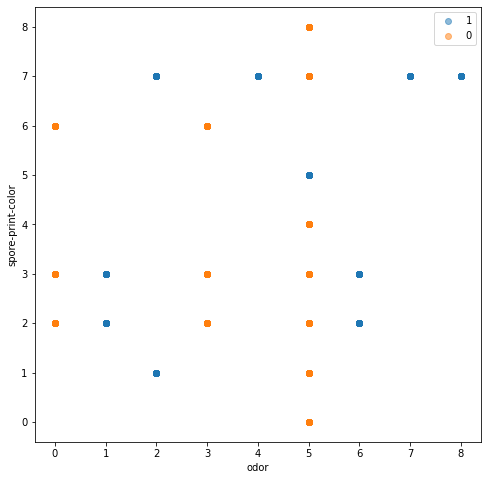

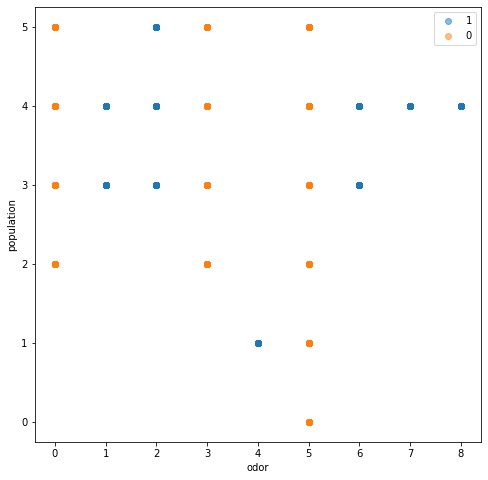

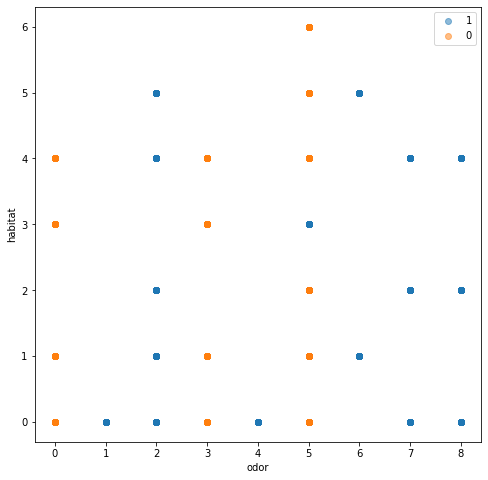

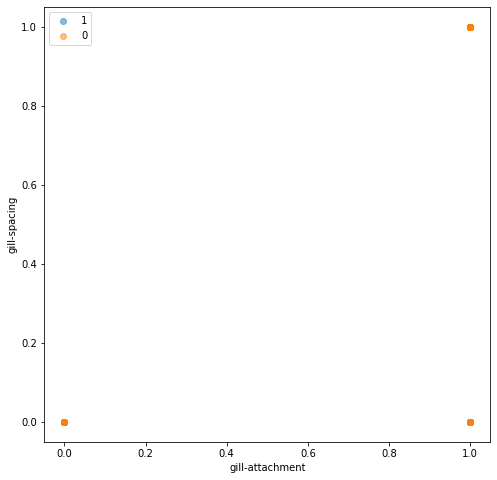

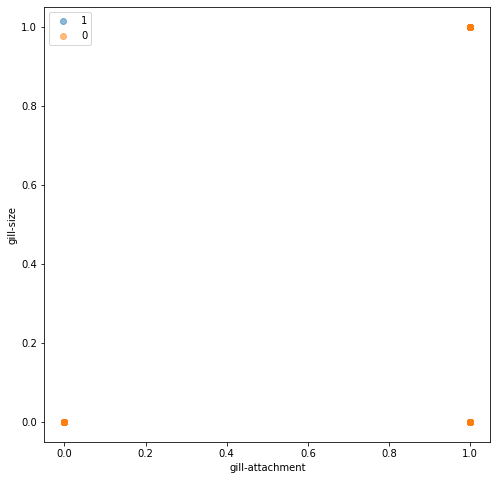

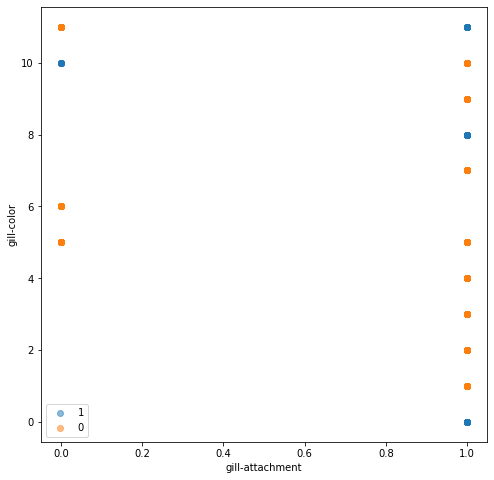

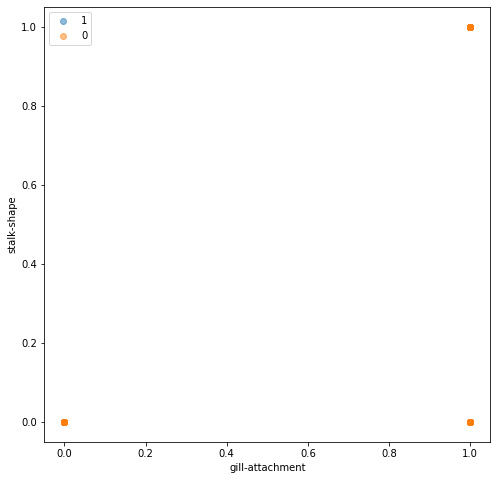

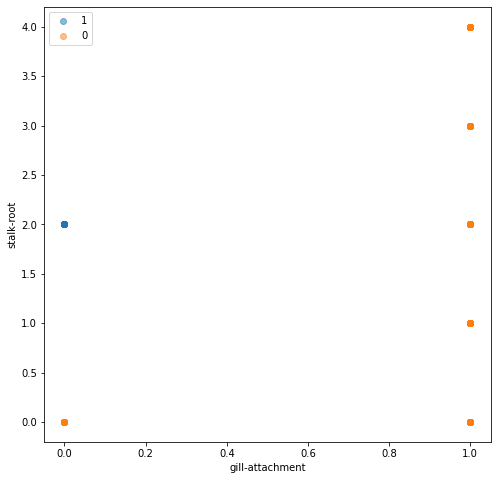

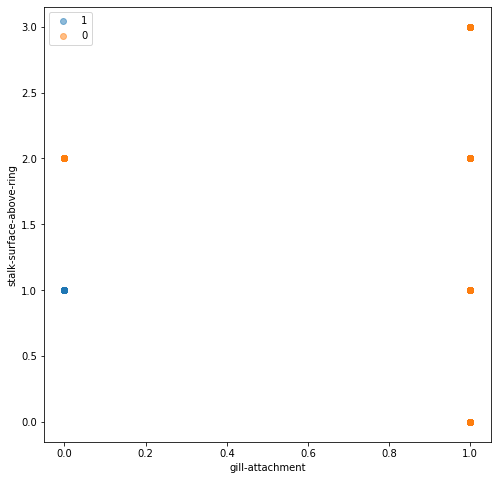

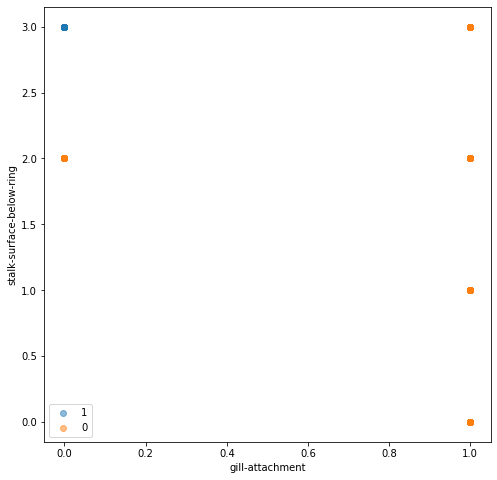

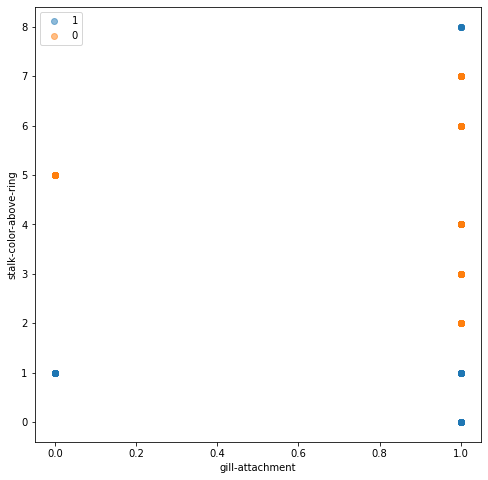

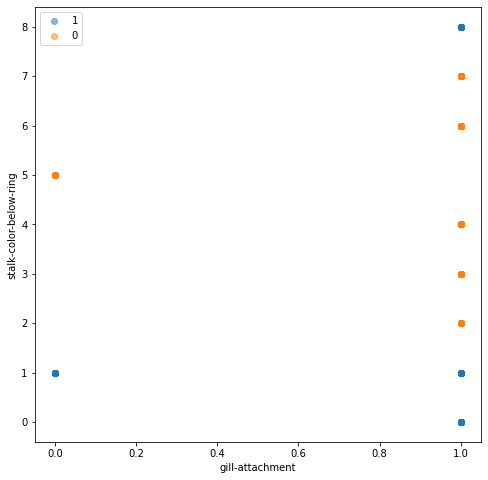

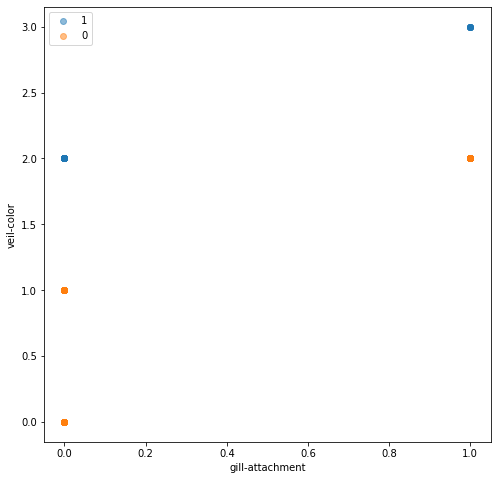

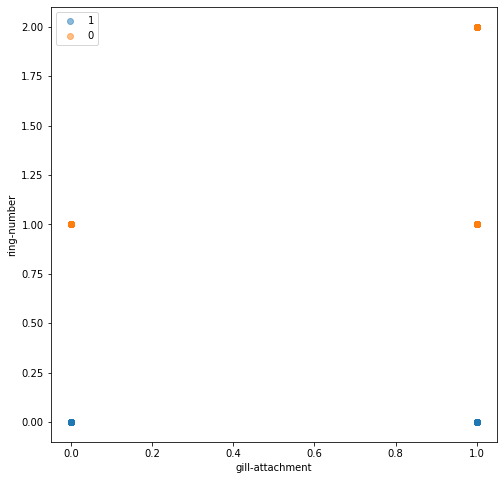

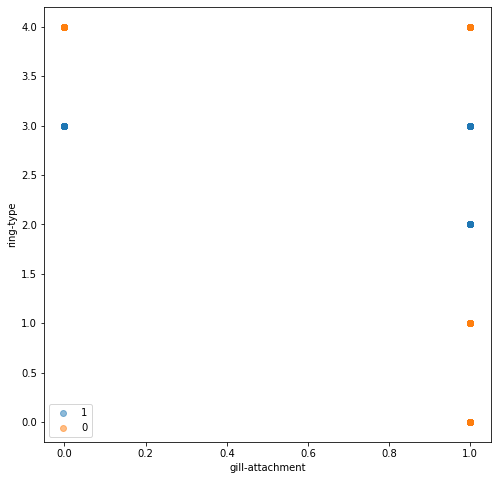

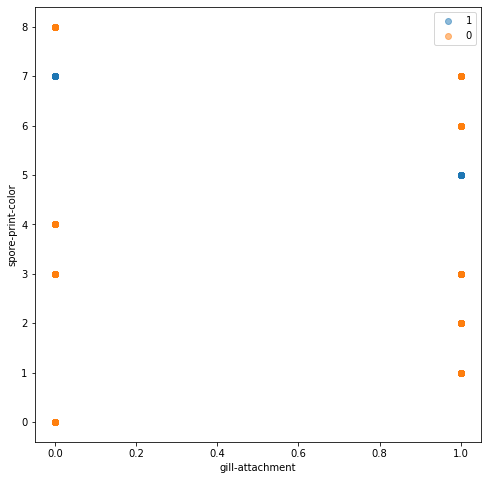

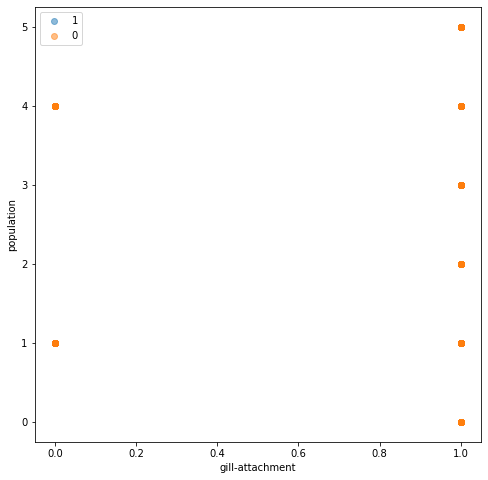

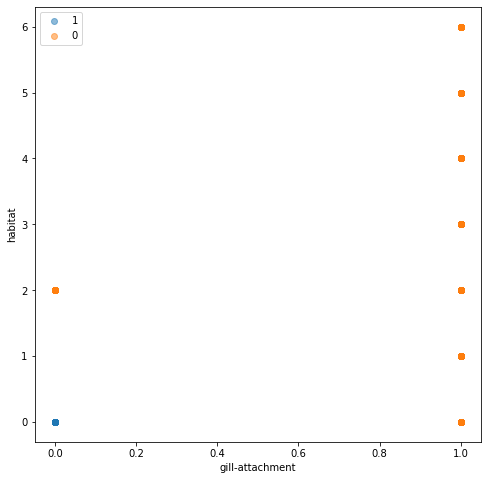

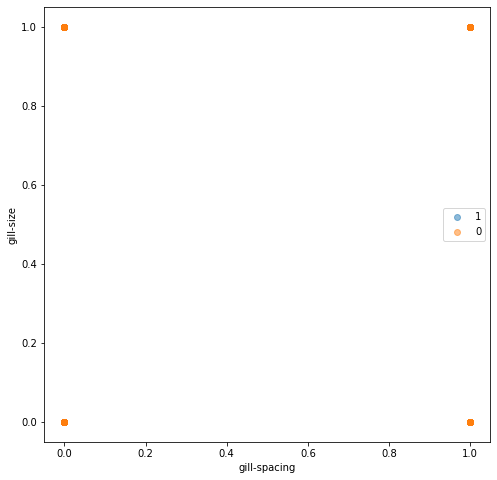

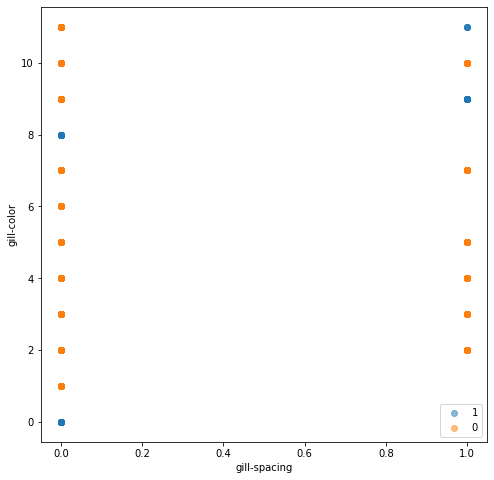

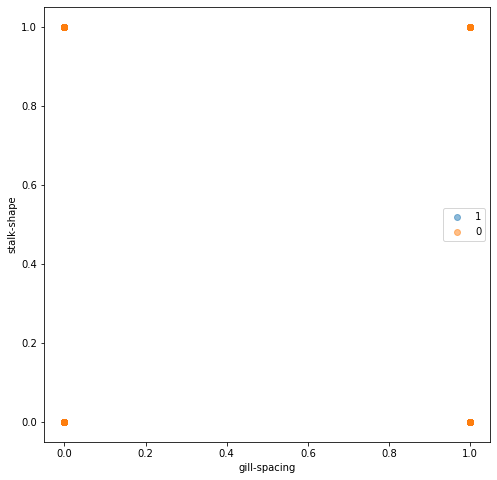

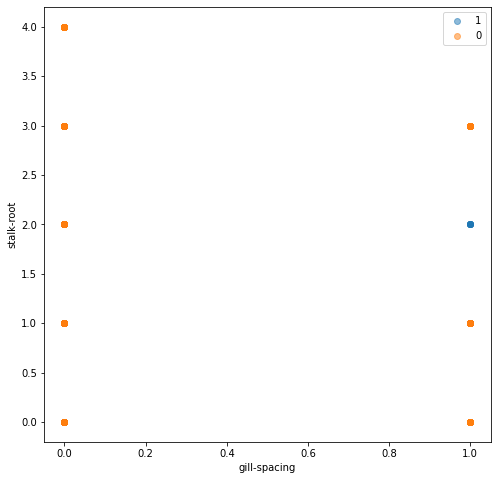

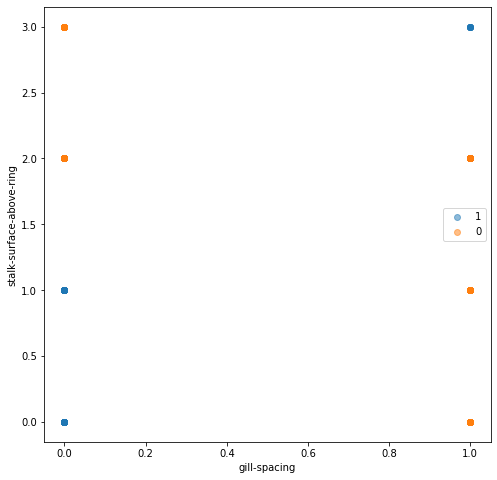

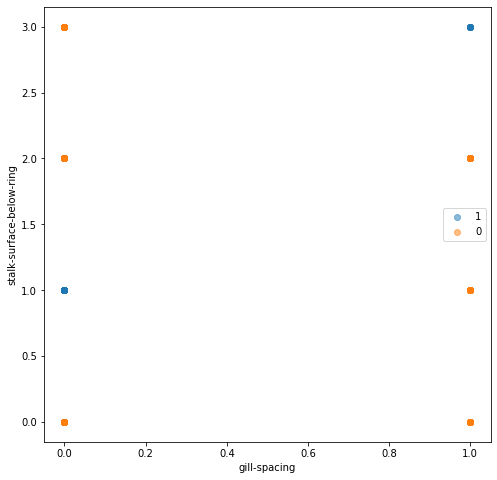

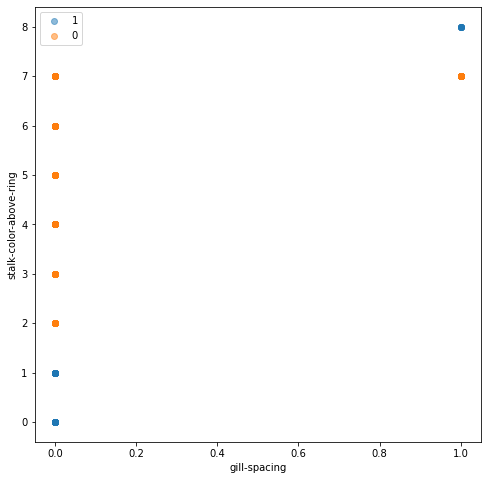

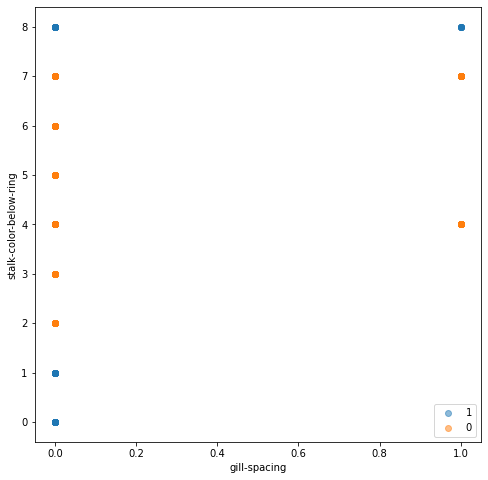

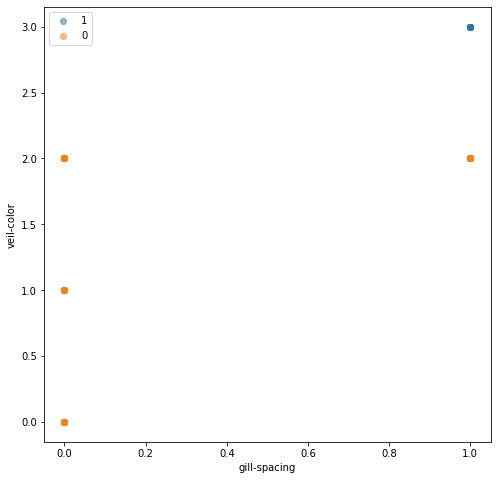

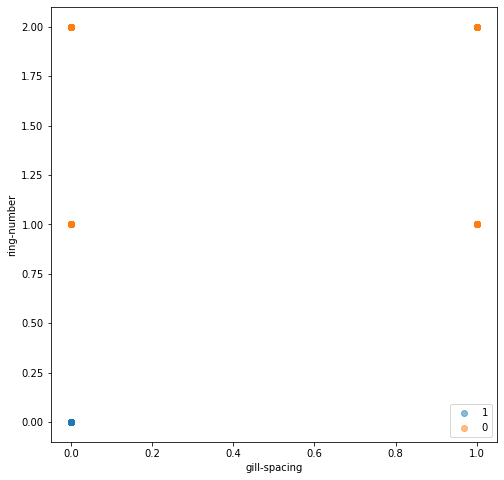

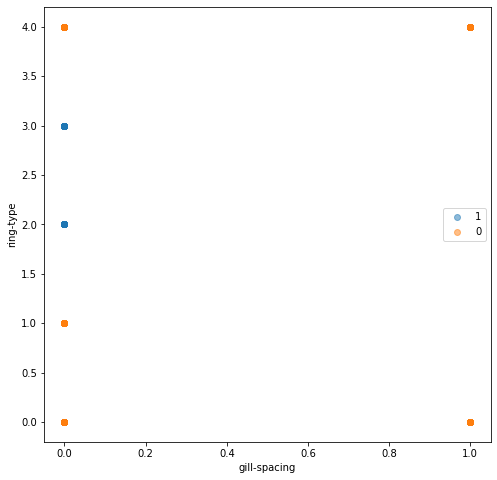

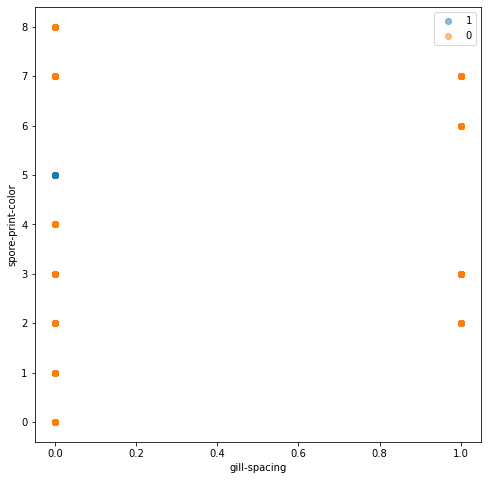

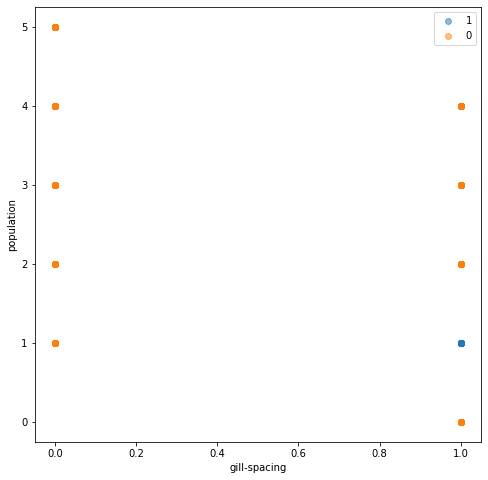

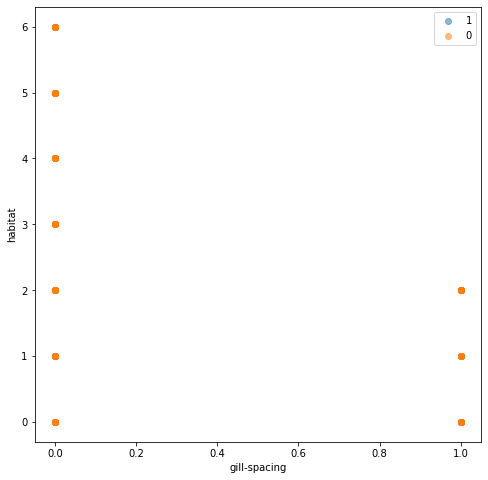

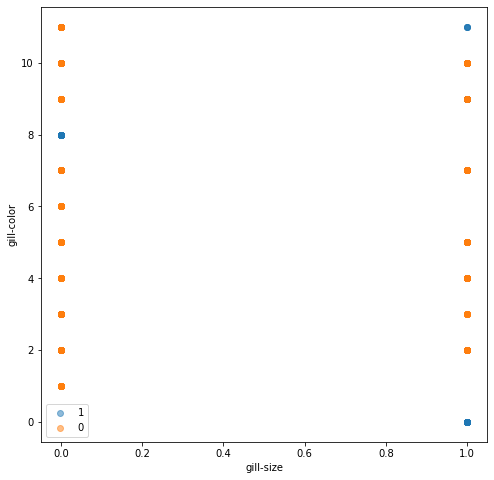

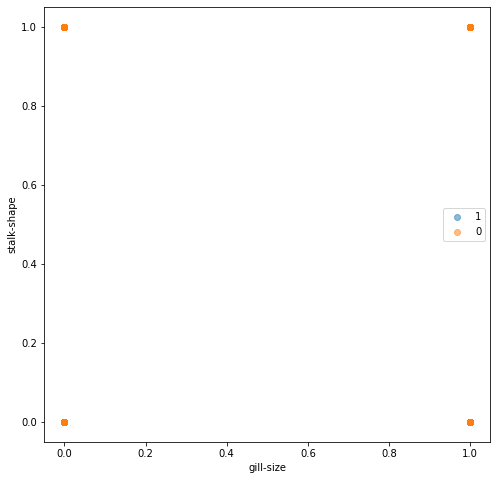

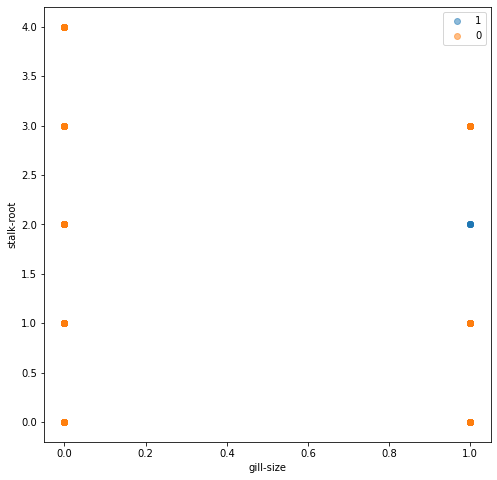

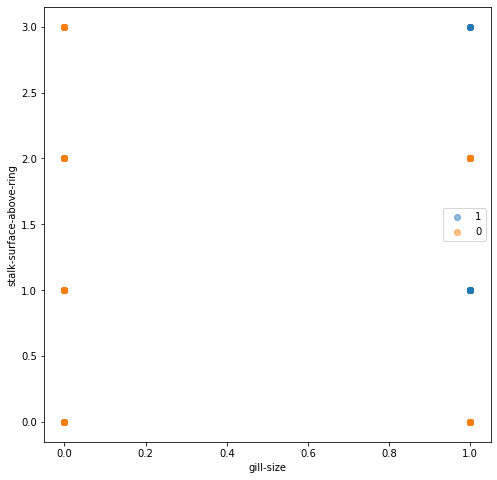

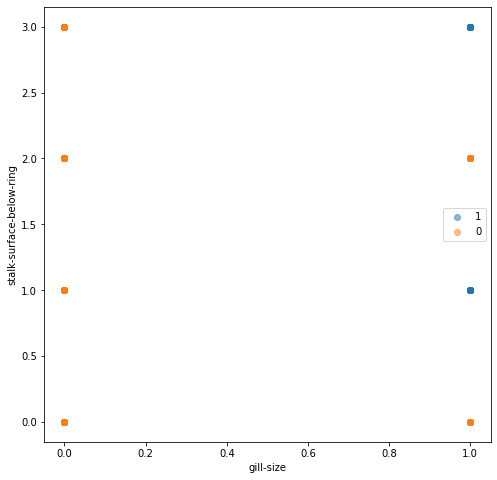

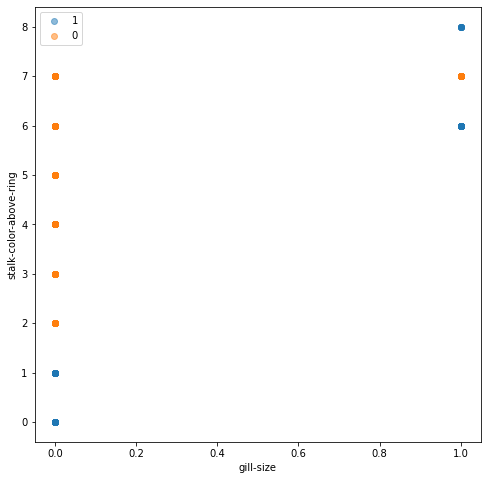

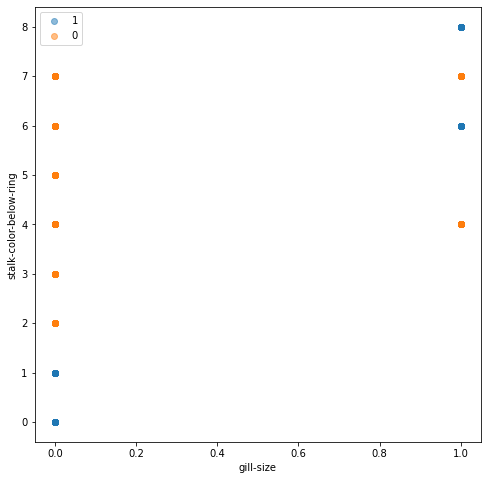

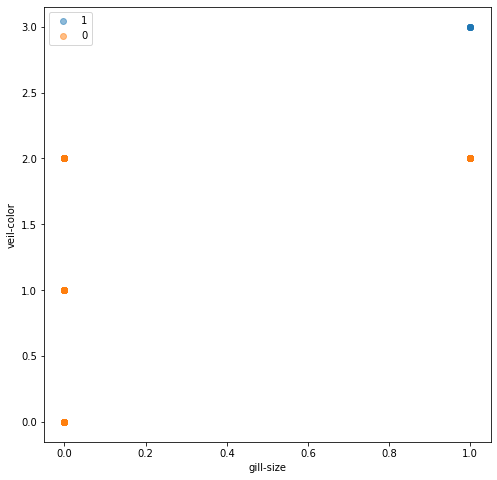

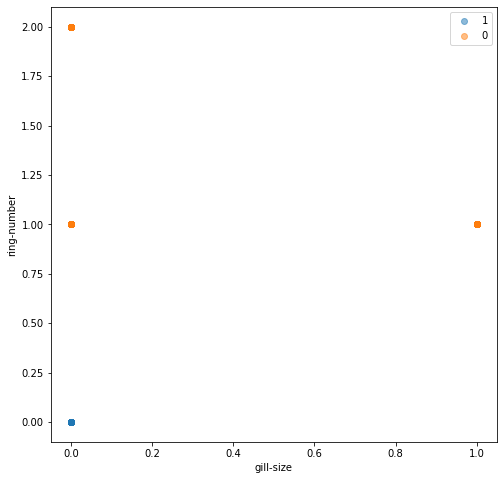

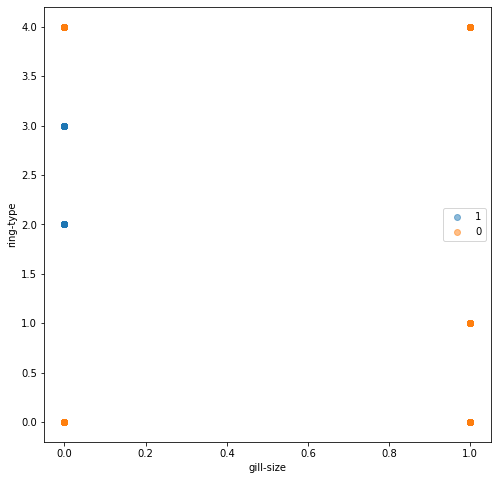

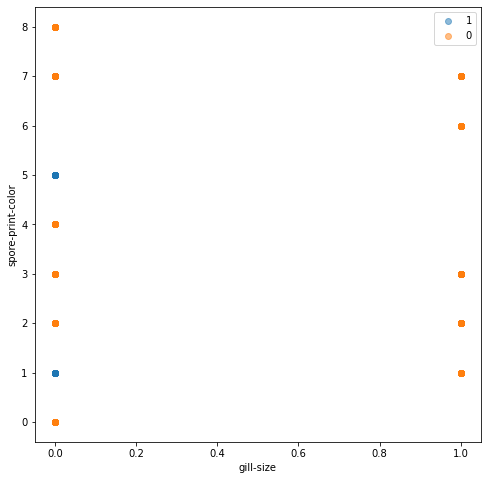

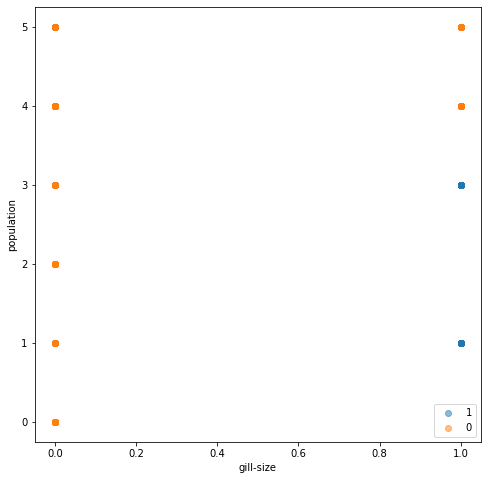

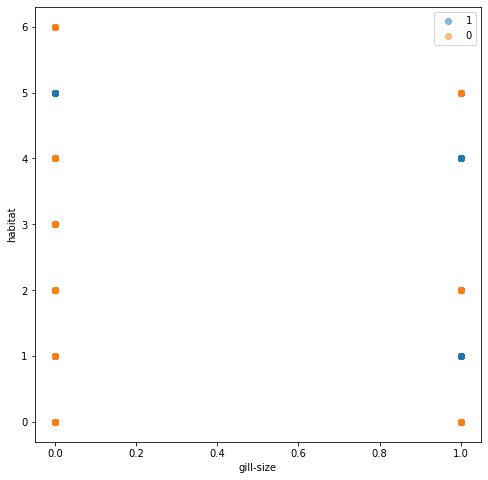

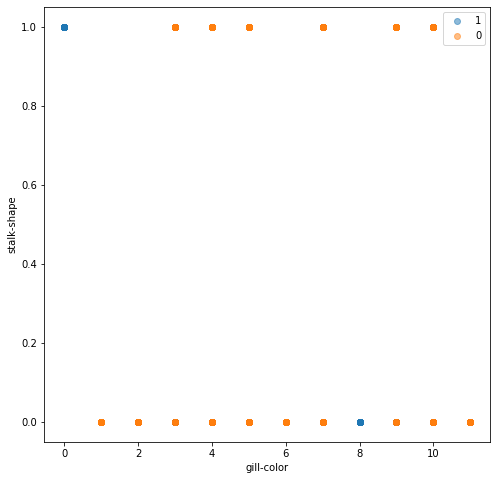

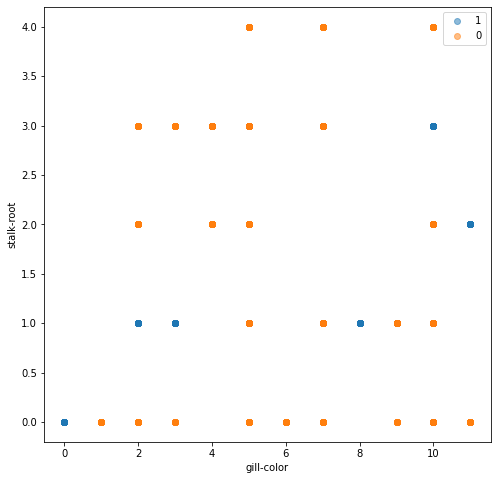

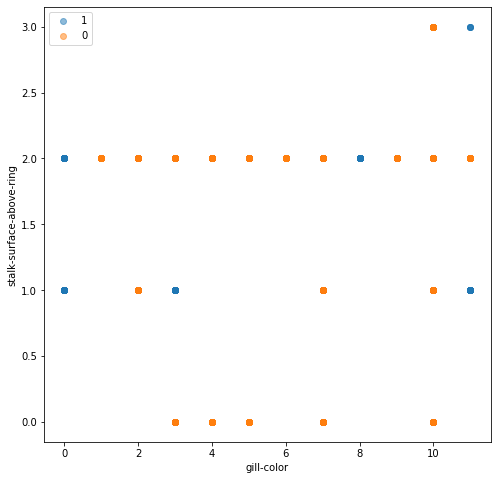

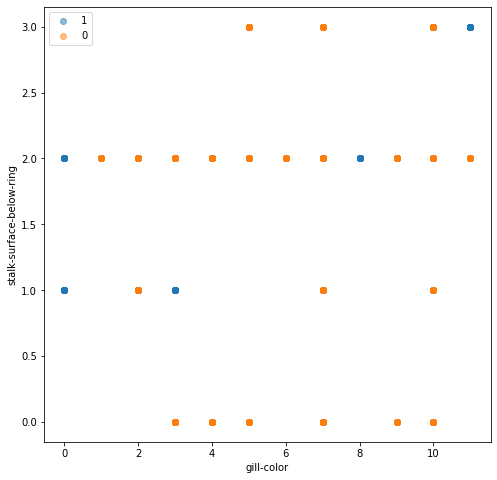

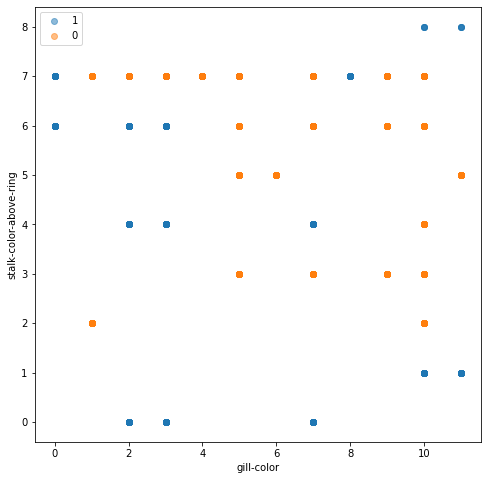

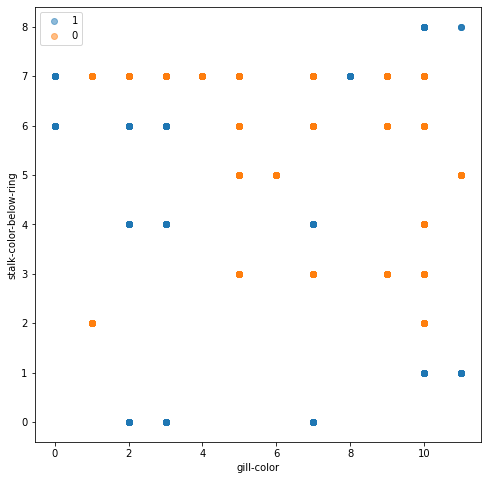

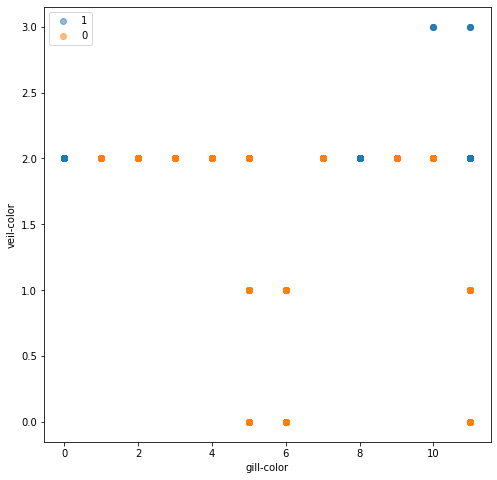

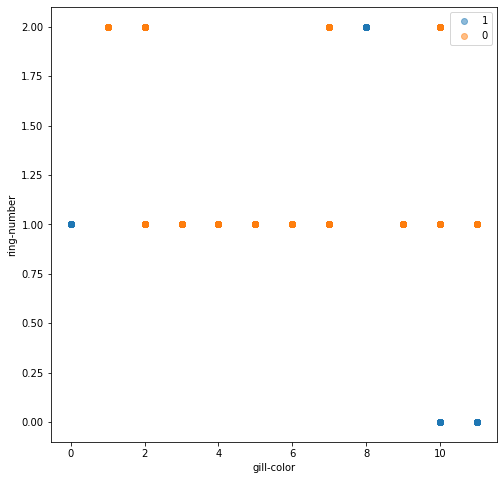

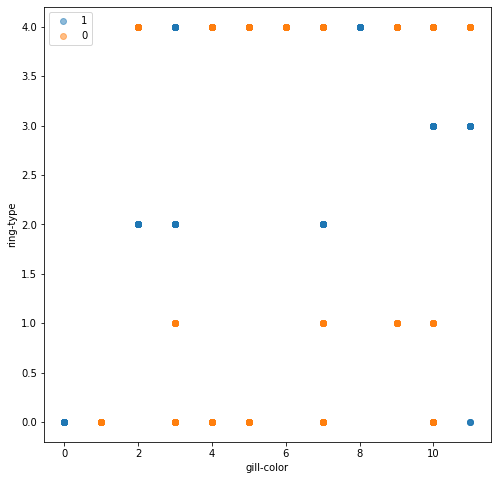

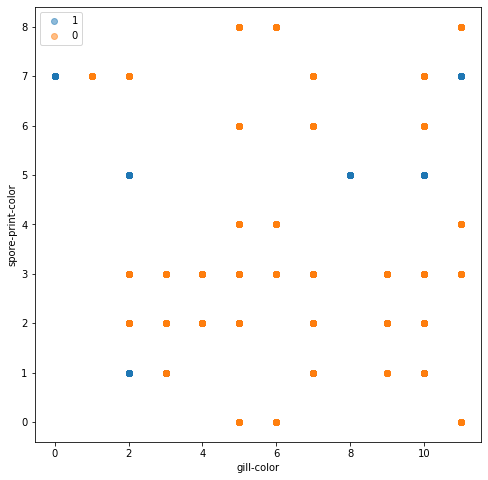

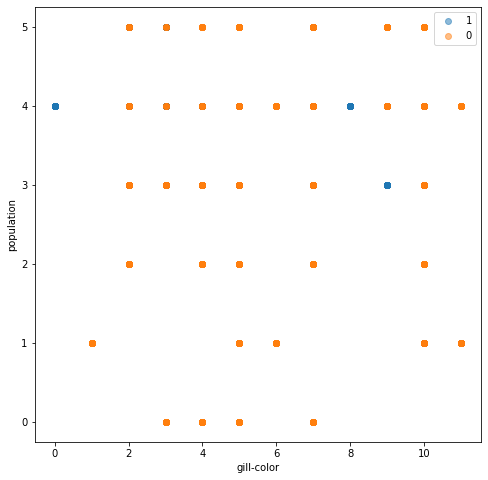

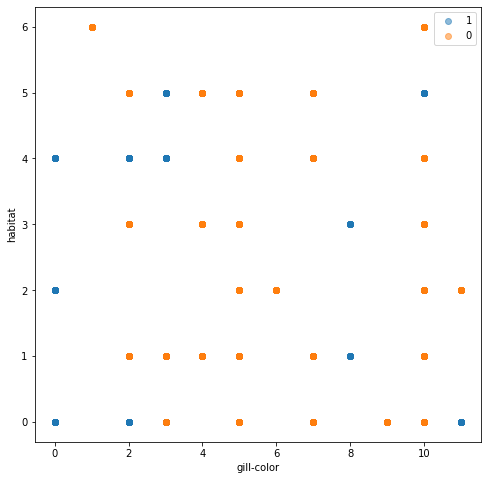

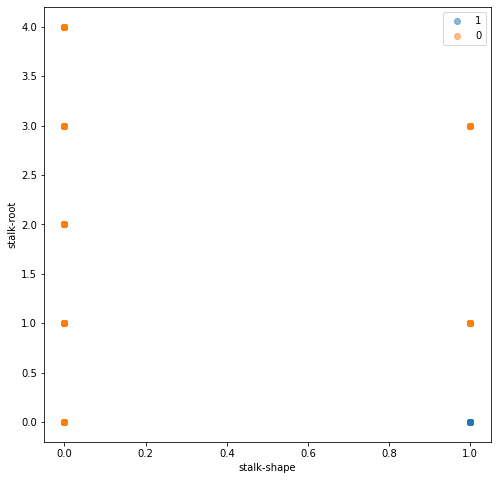

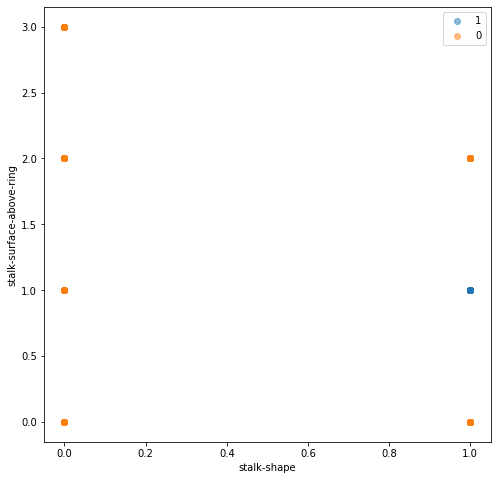

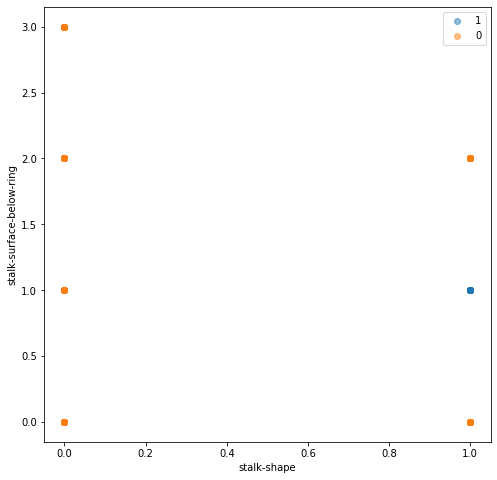

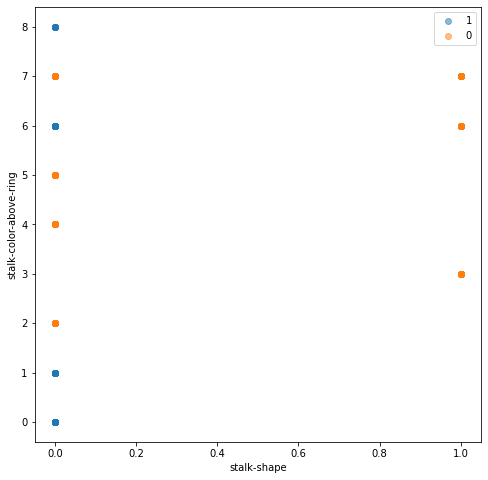

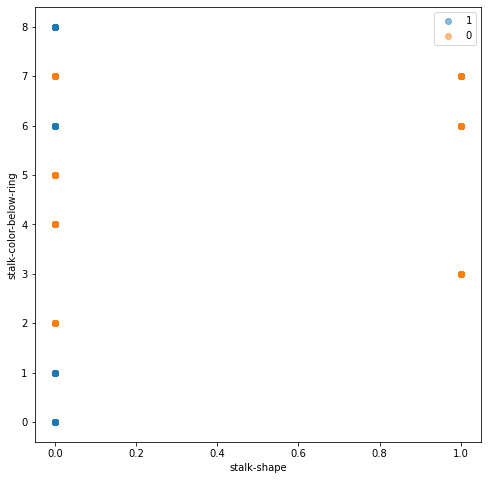

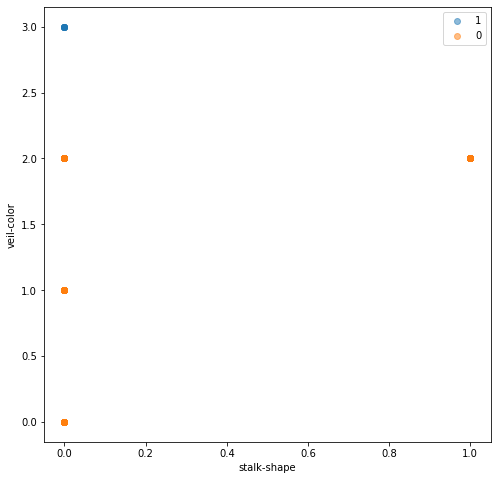

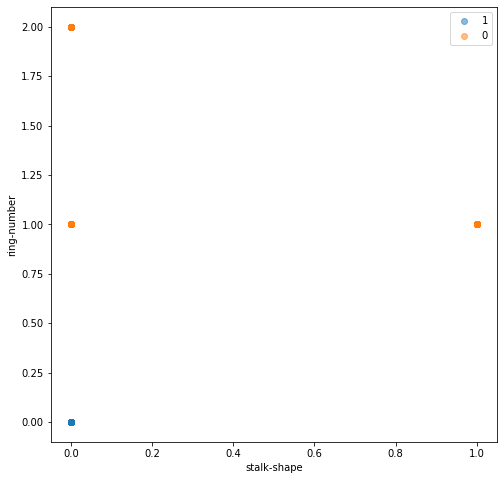

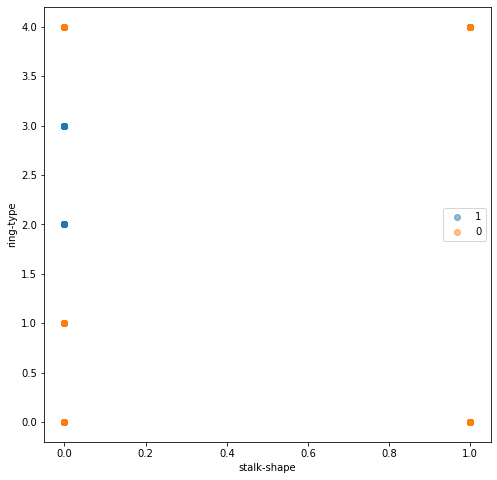

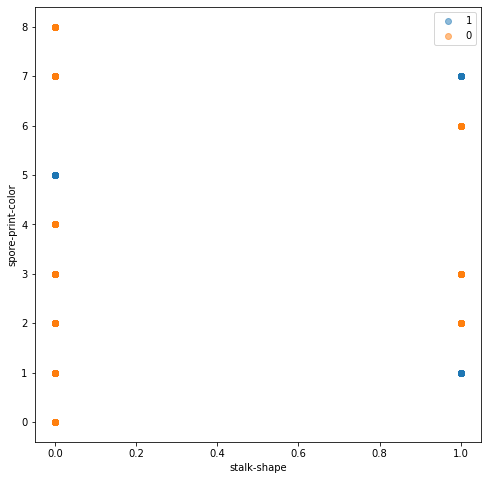

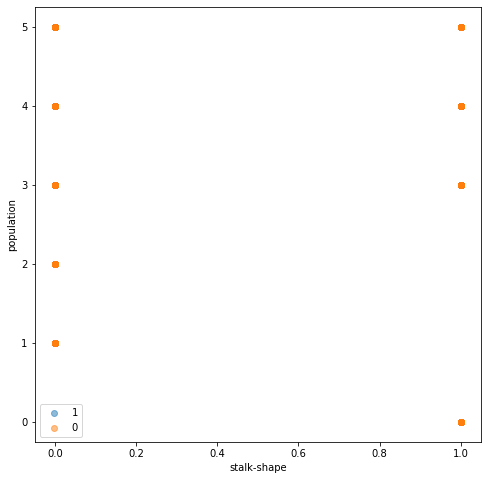

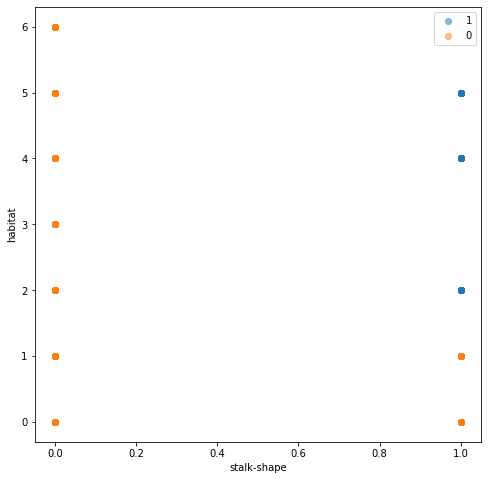

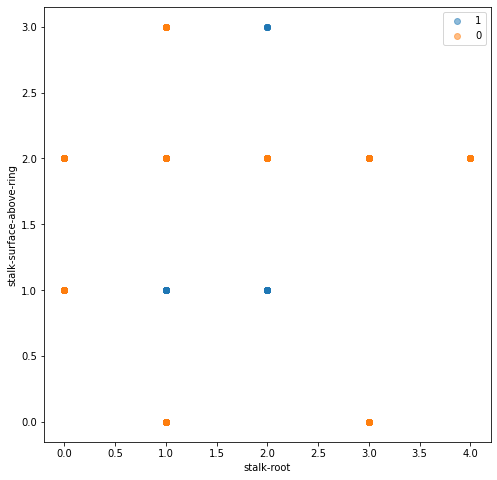

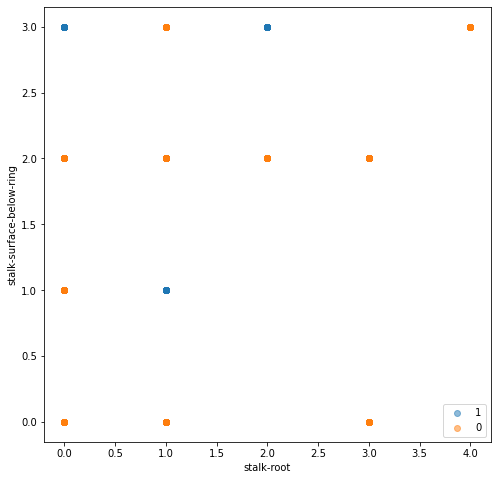

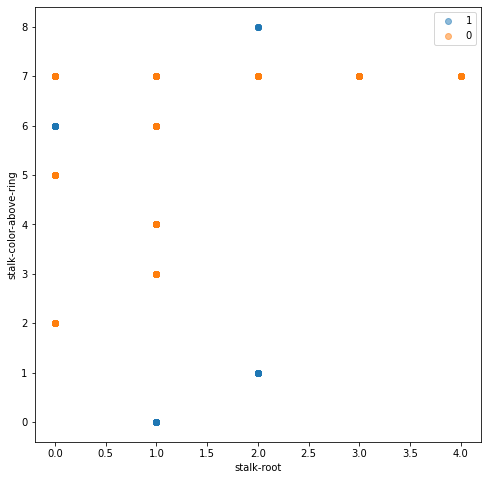

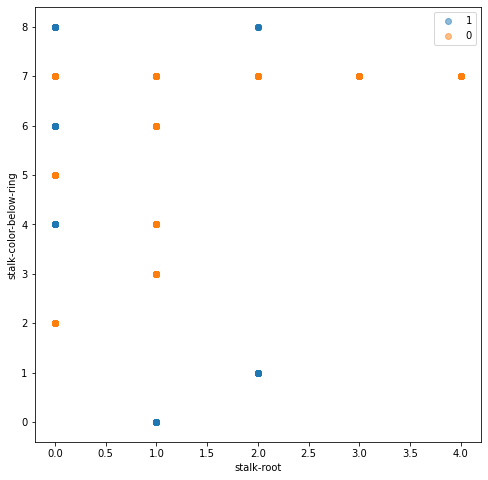

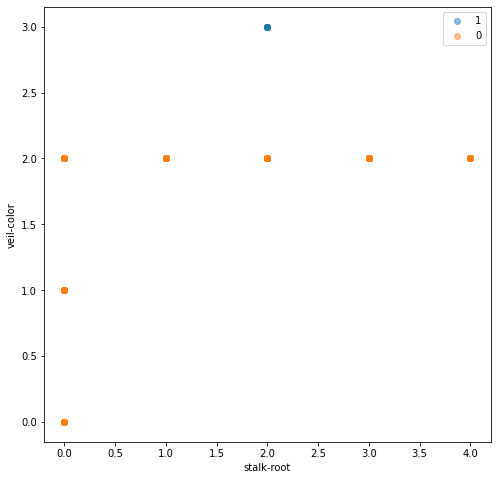

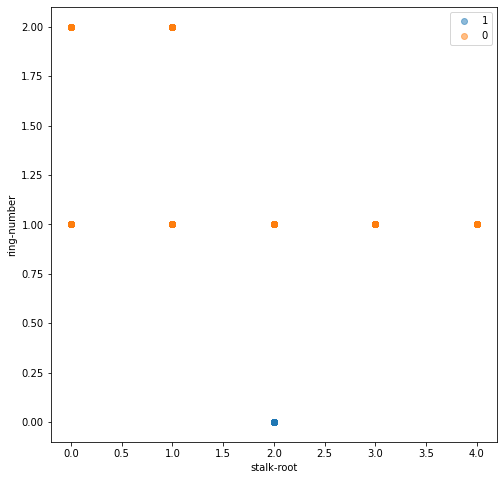

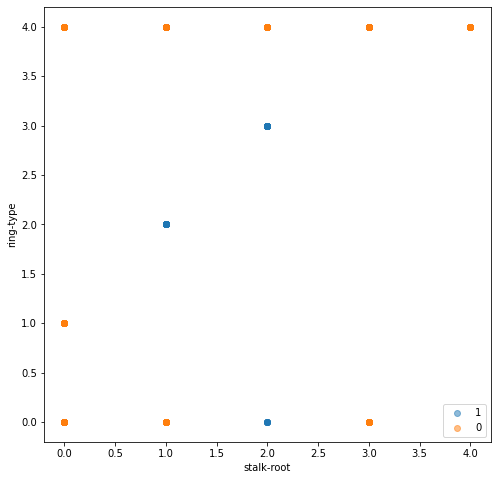

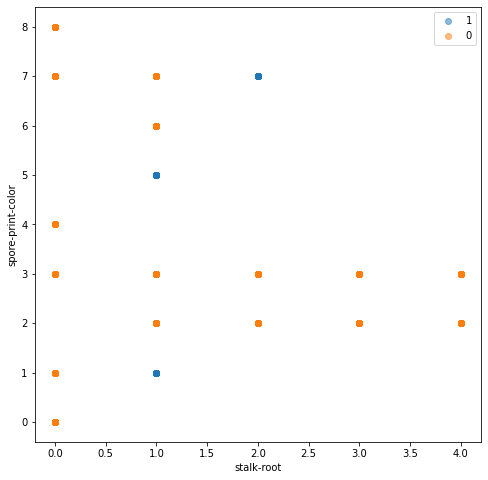

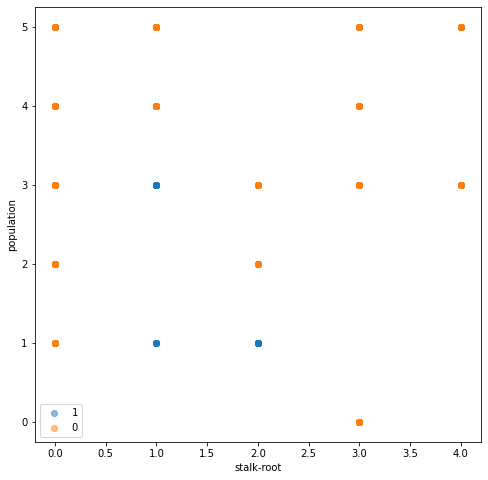

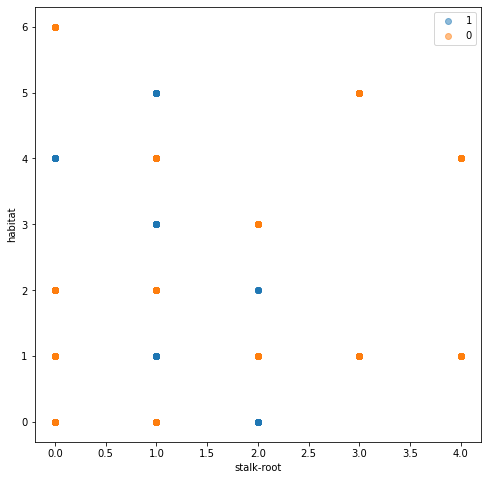

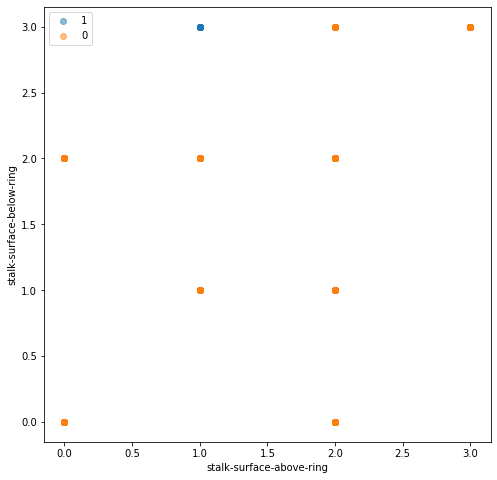

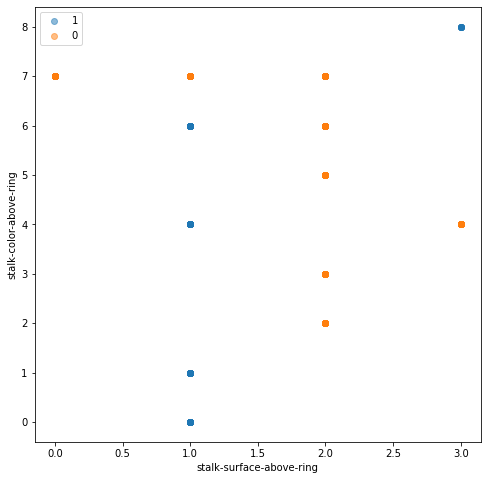

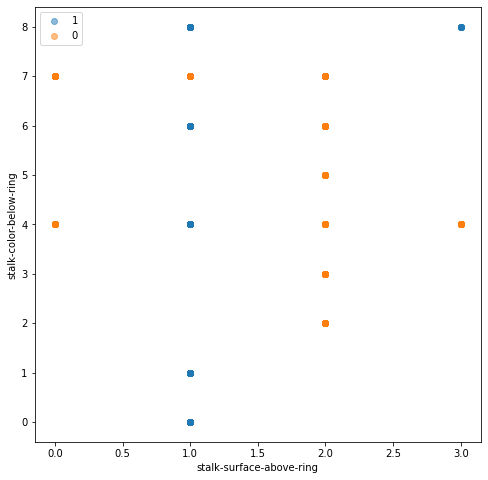

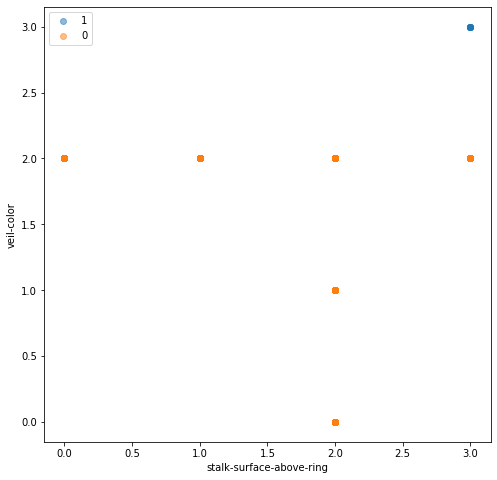

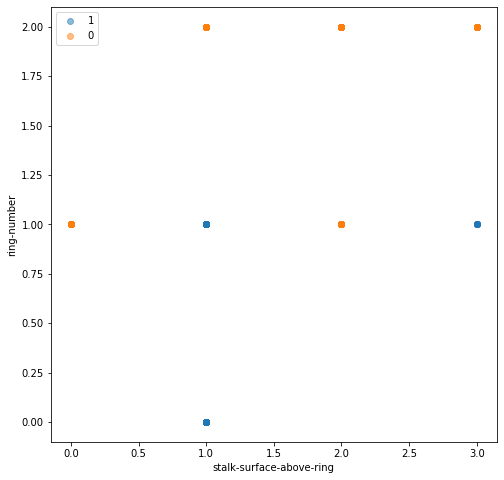

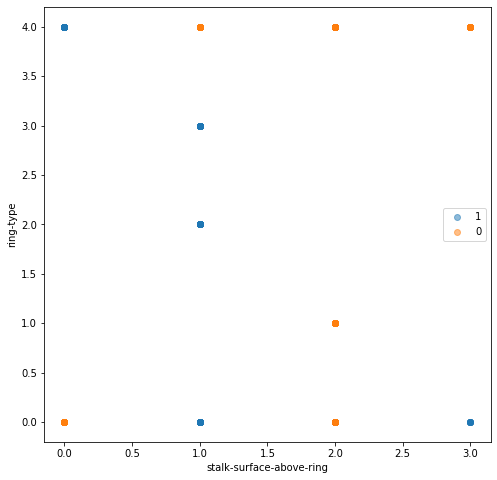

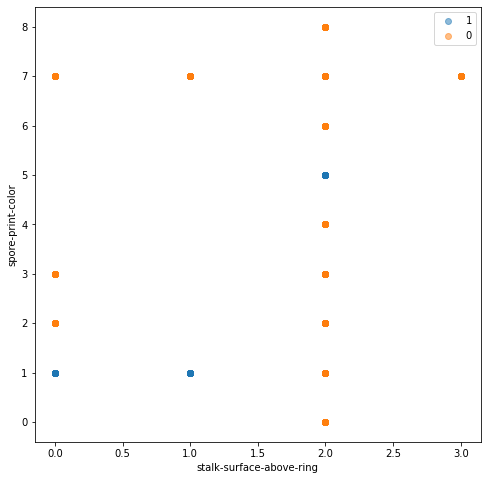

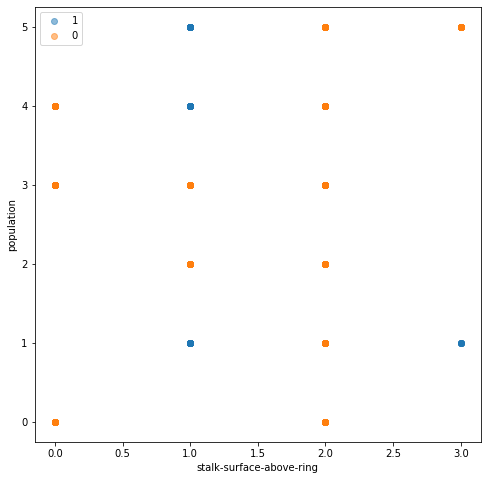

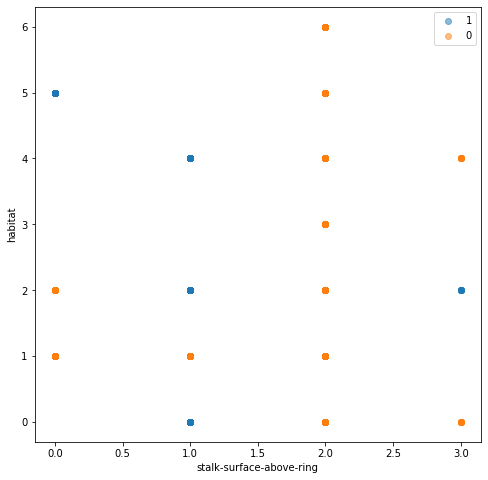

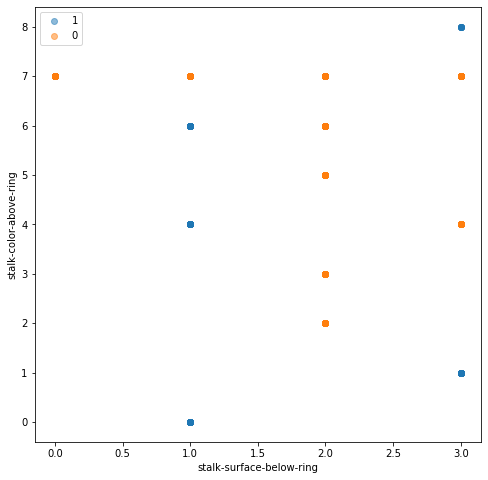

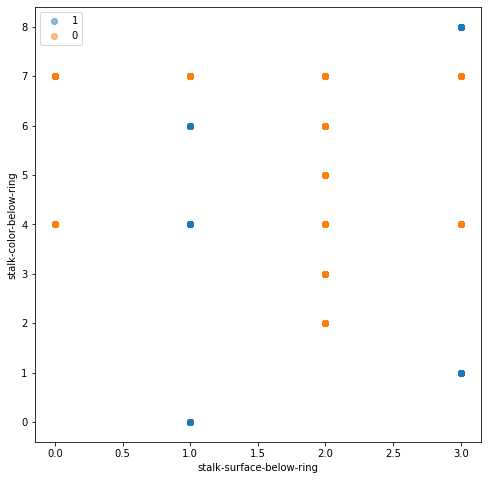

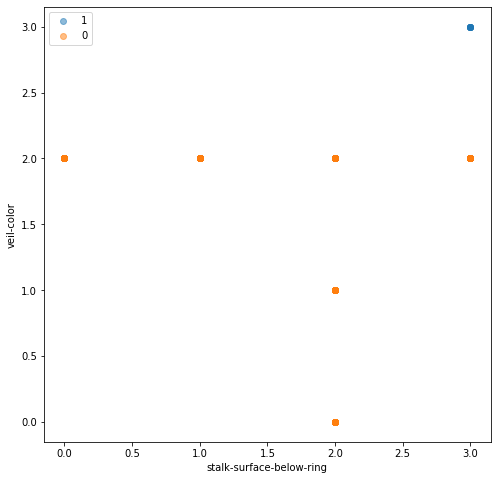

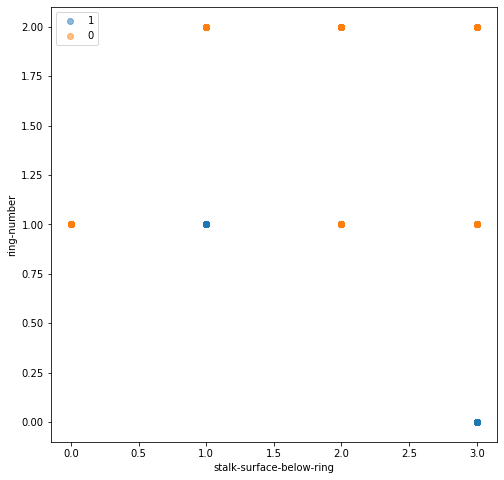

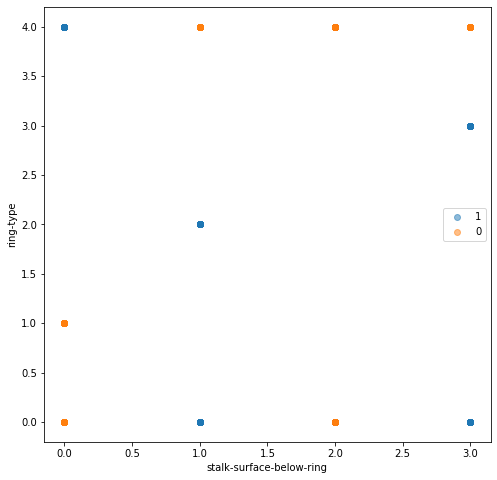

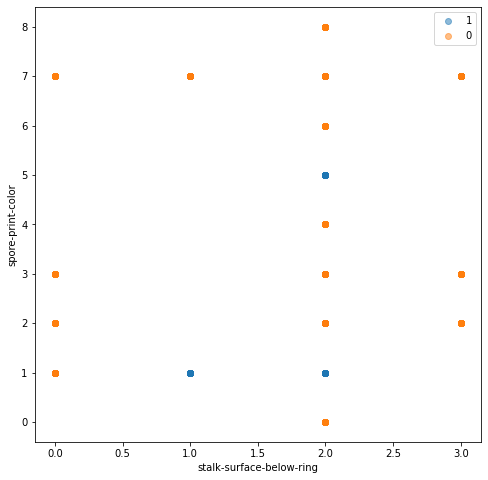

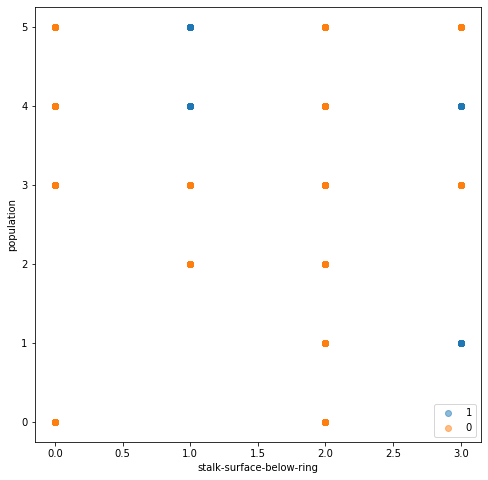

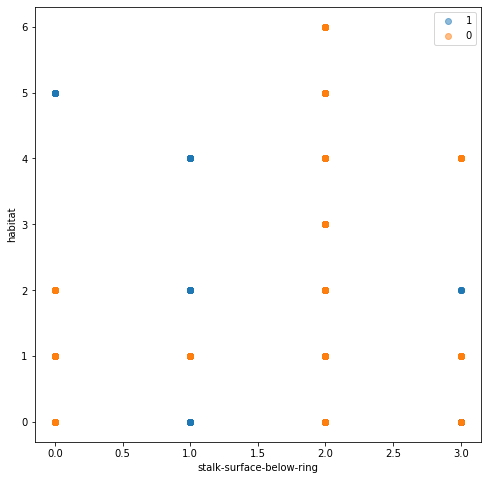

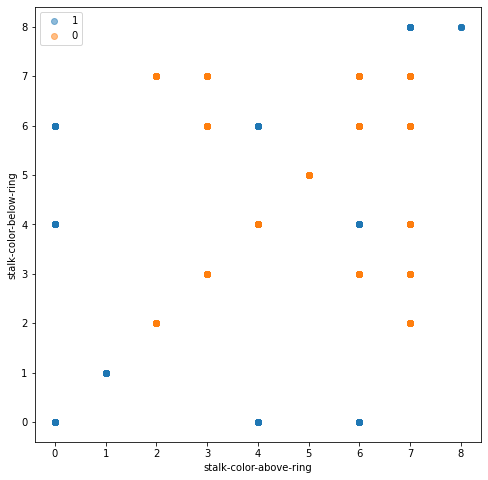

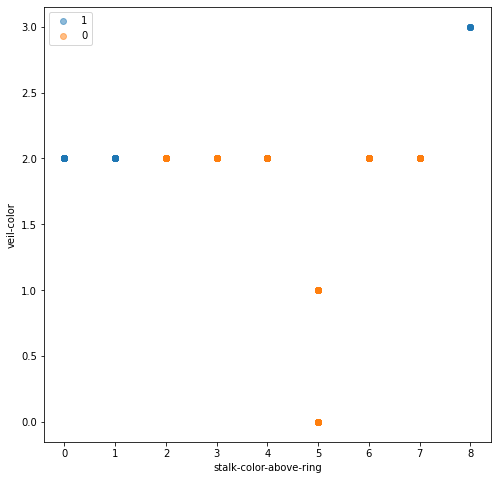

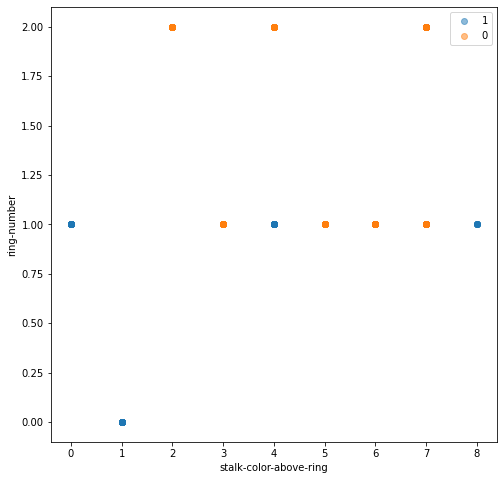

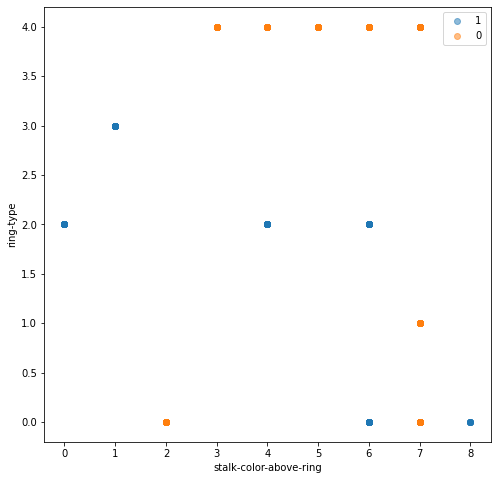

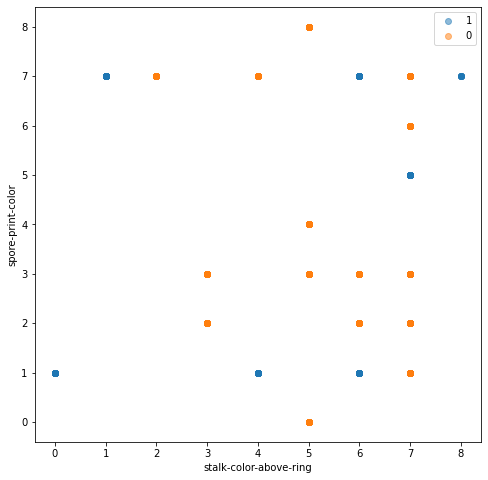

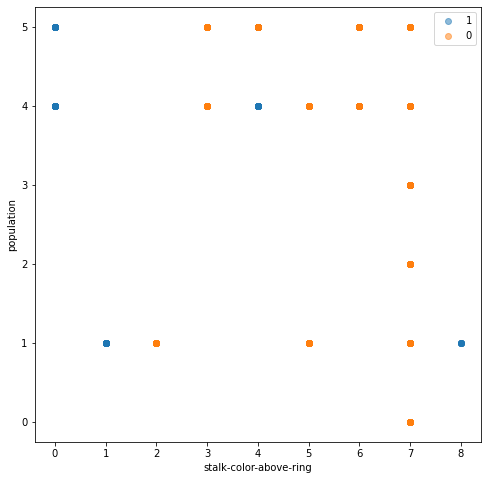

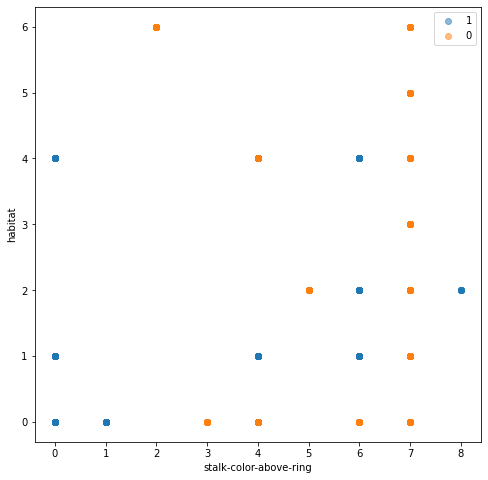

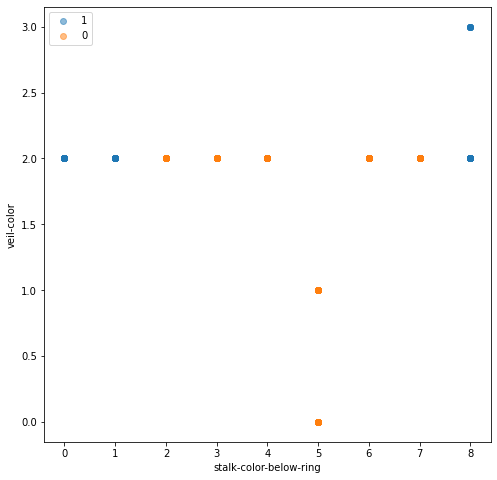

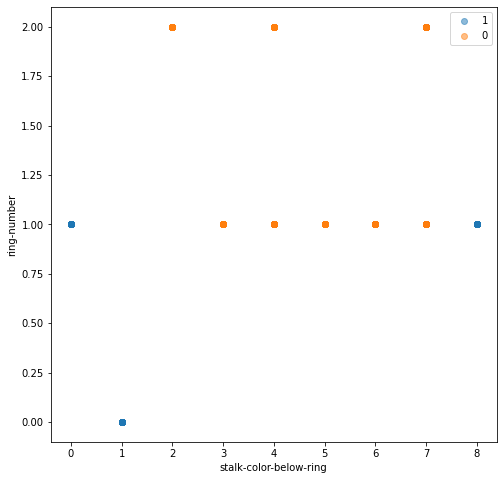

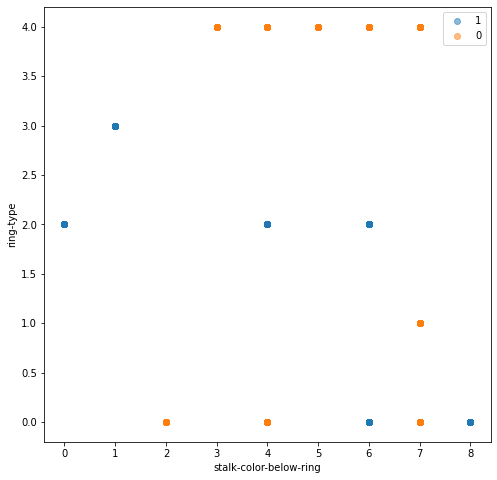

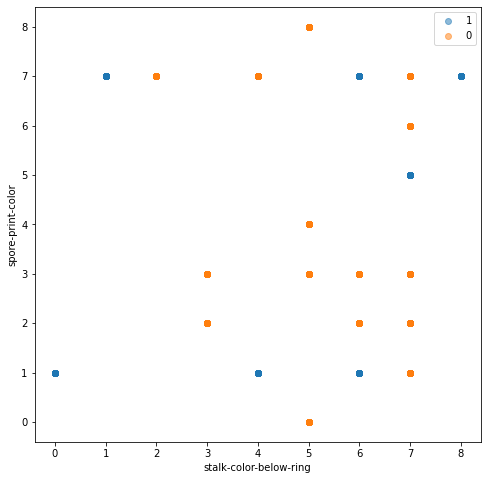

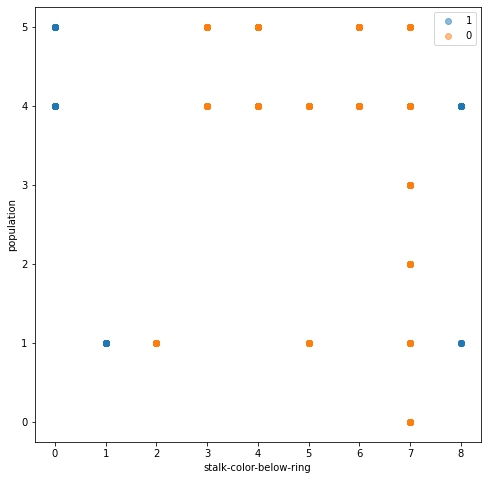

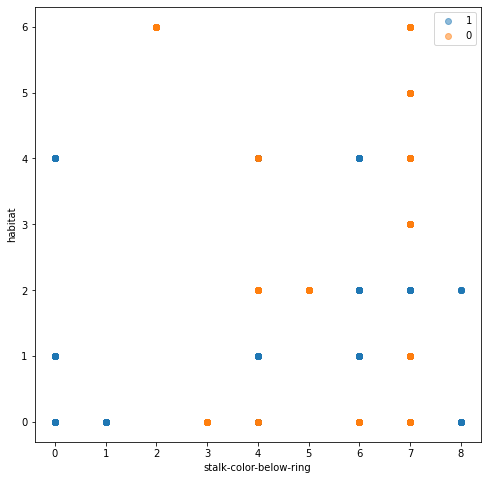

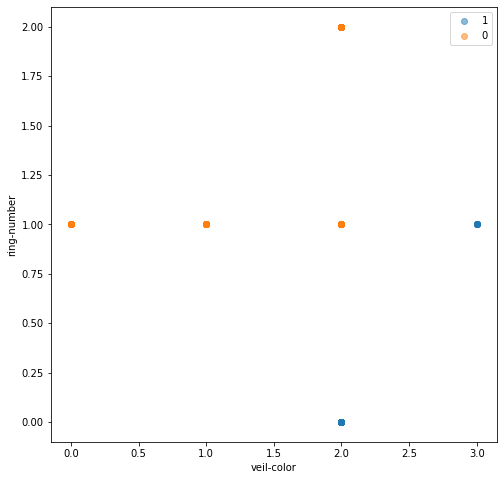

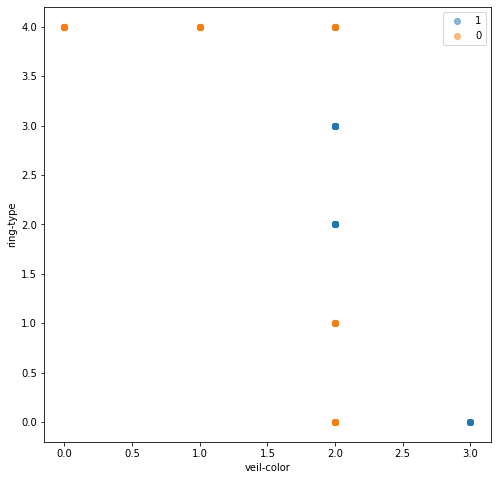

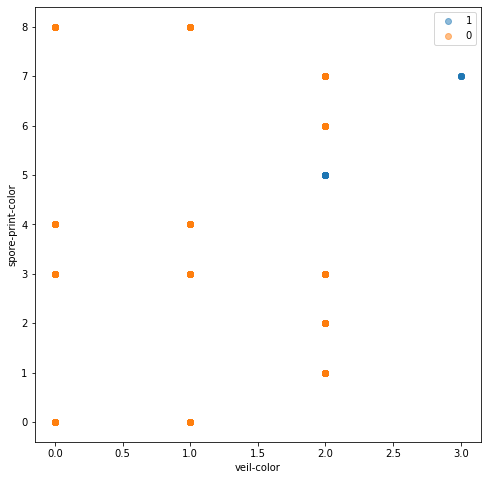

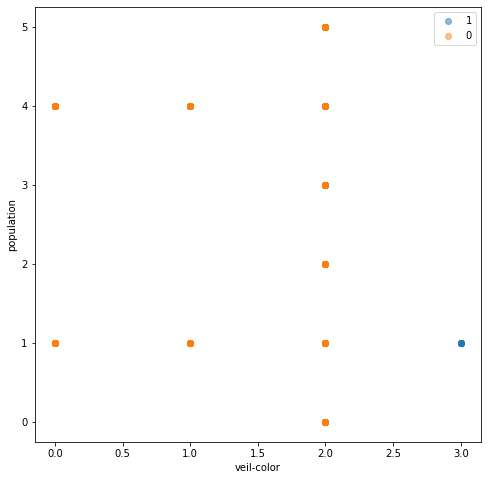

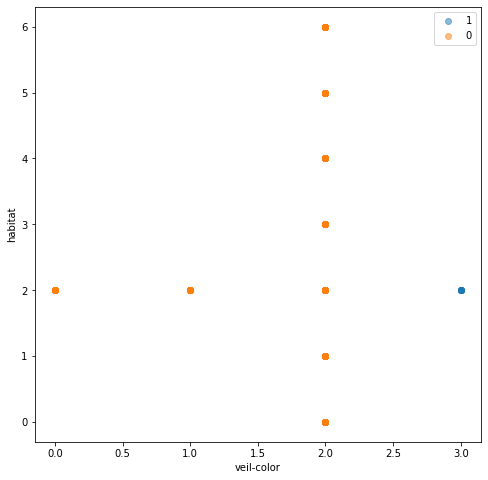

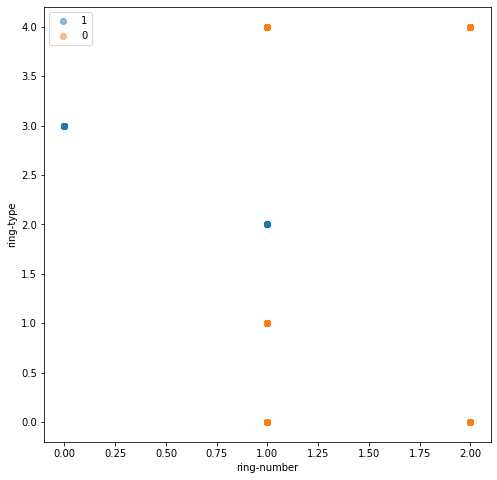

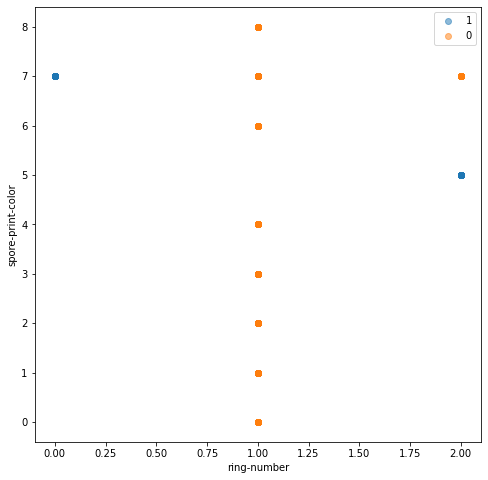

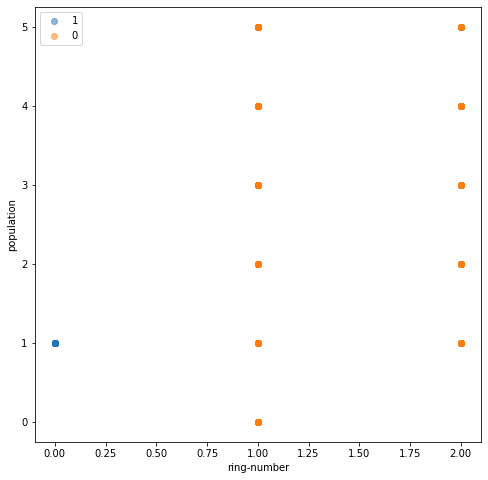

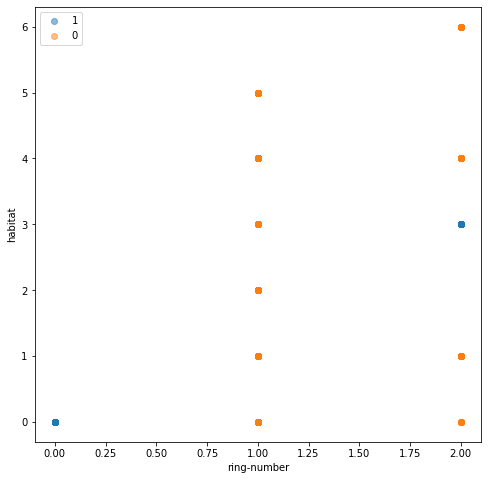

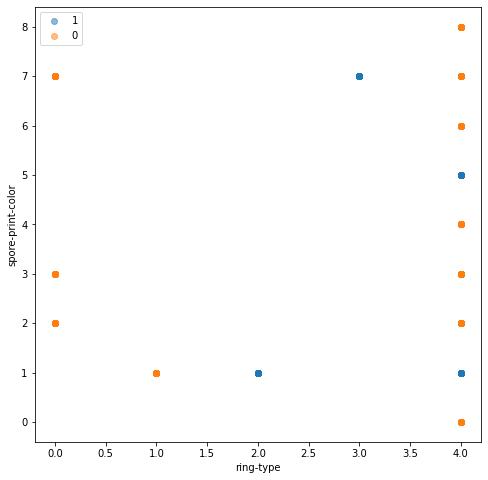

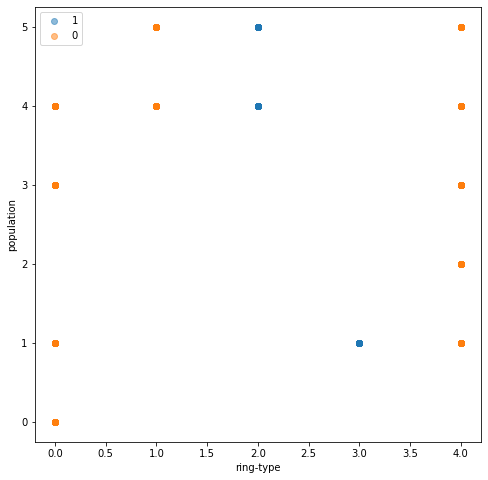

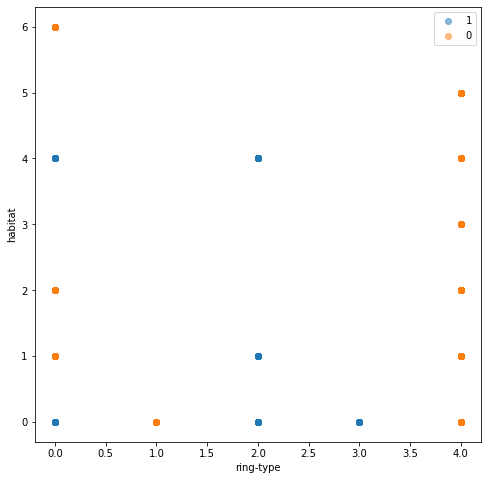

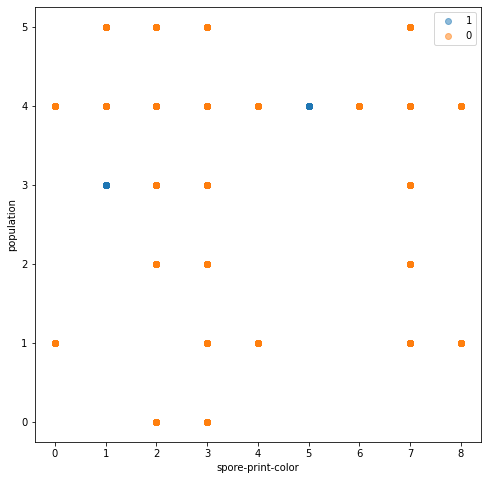

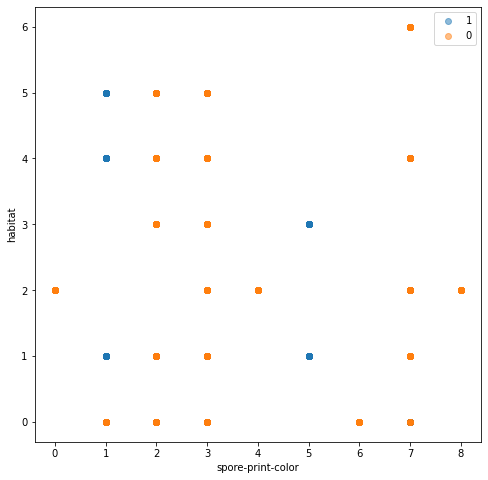

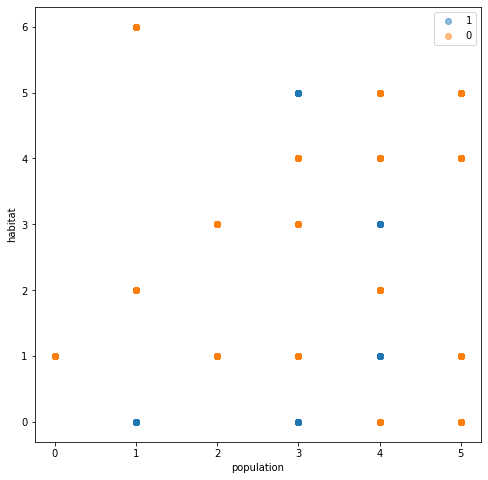

In [25]:
from itertools import combinations
mushrooms = df
# Создание комбинаций признаков
features = list(mushrooms.columns[1:])
combs = list(combinations(features, 2))

# Построение графиков для каждой комбинации признаков
for comb in combs:
    plt.figure(figsize=(8, 8))
    for cls in mushrooms['class'].unique():
        plt.scatter(mushrooms[mushrooms['class'] == cls][comb[0]],
                    mushrooms[mushrooms['class'] == cls][comb[1]],
                    label=cls, alpha=0.5)
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.legend()
    plt.show()

c:\users\alexb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\alexb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


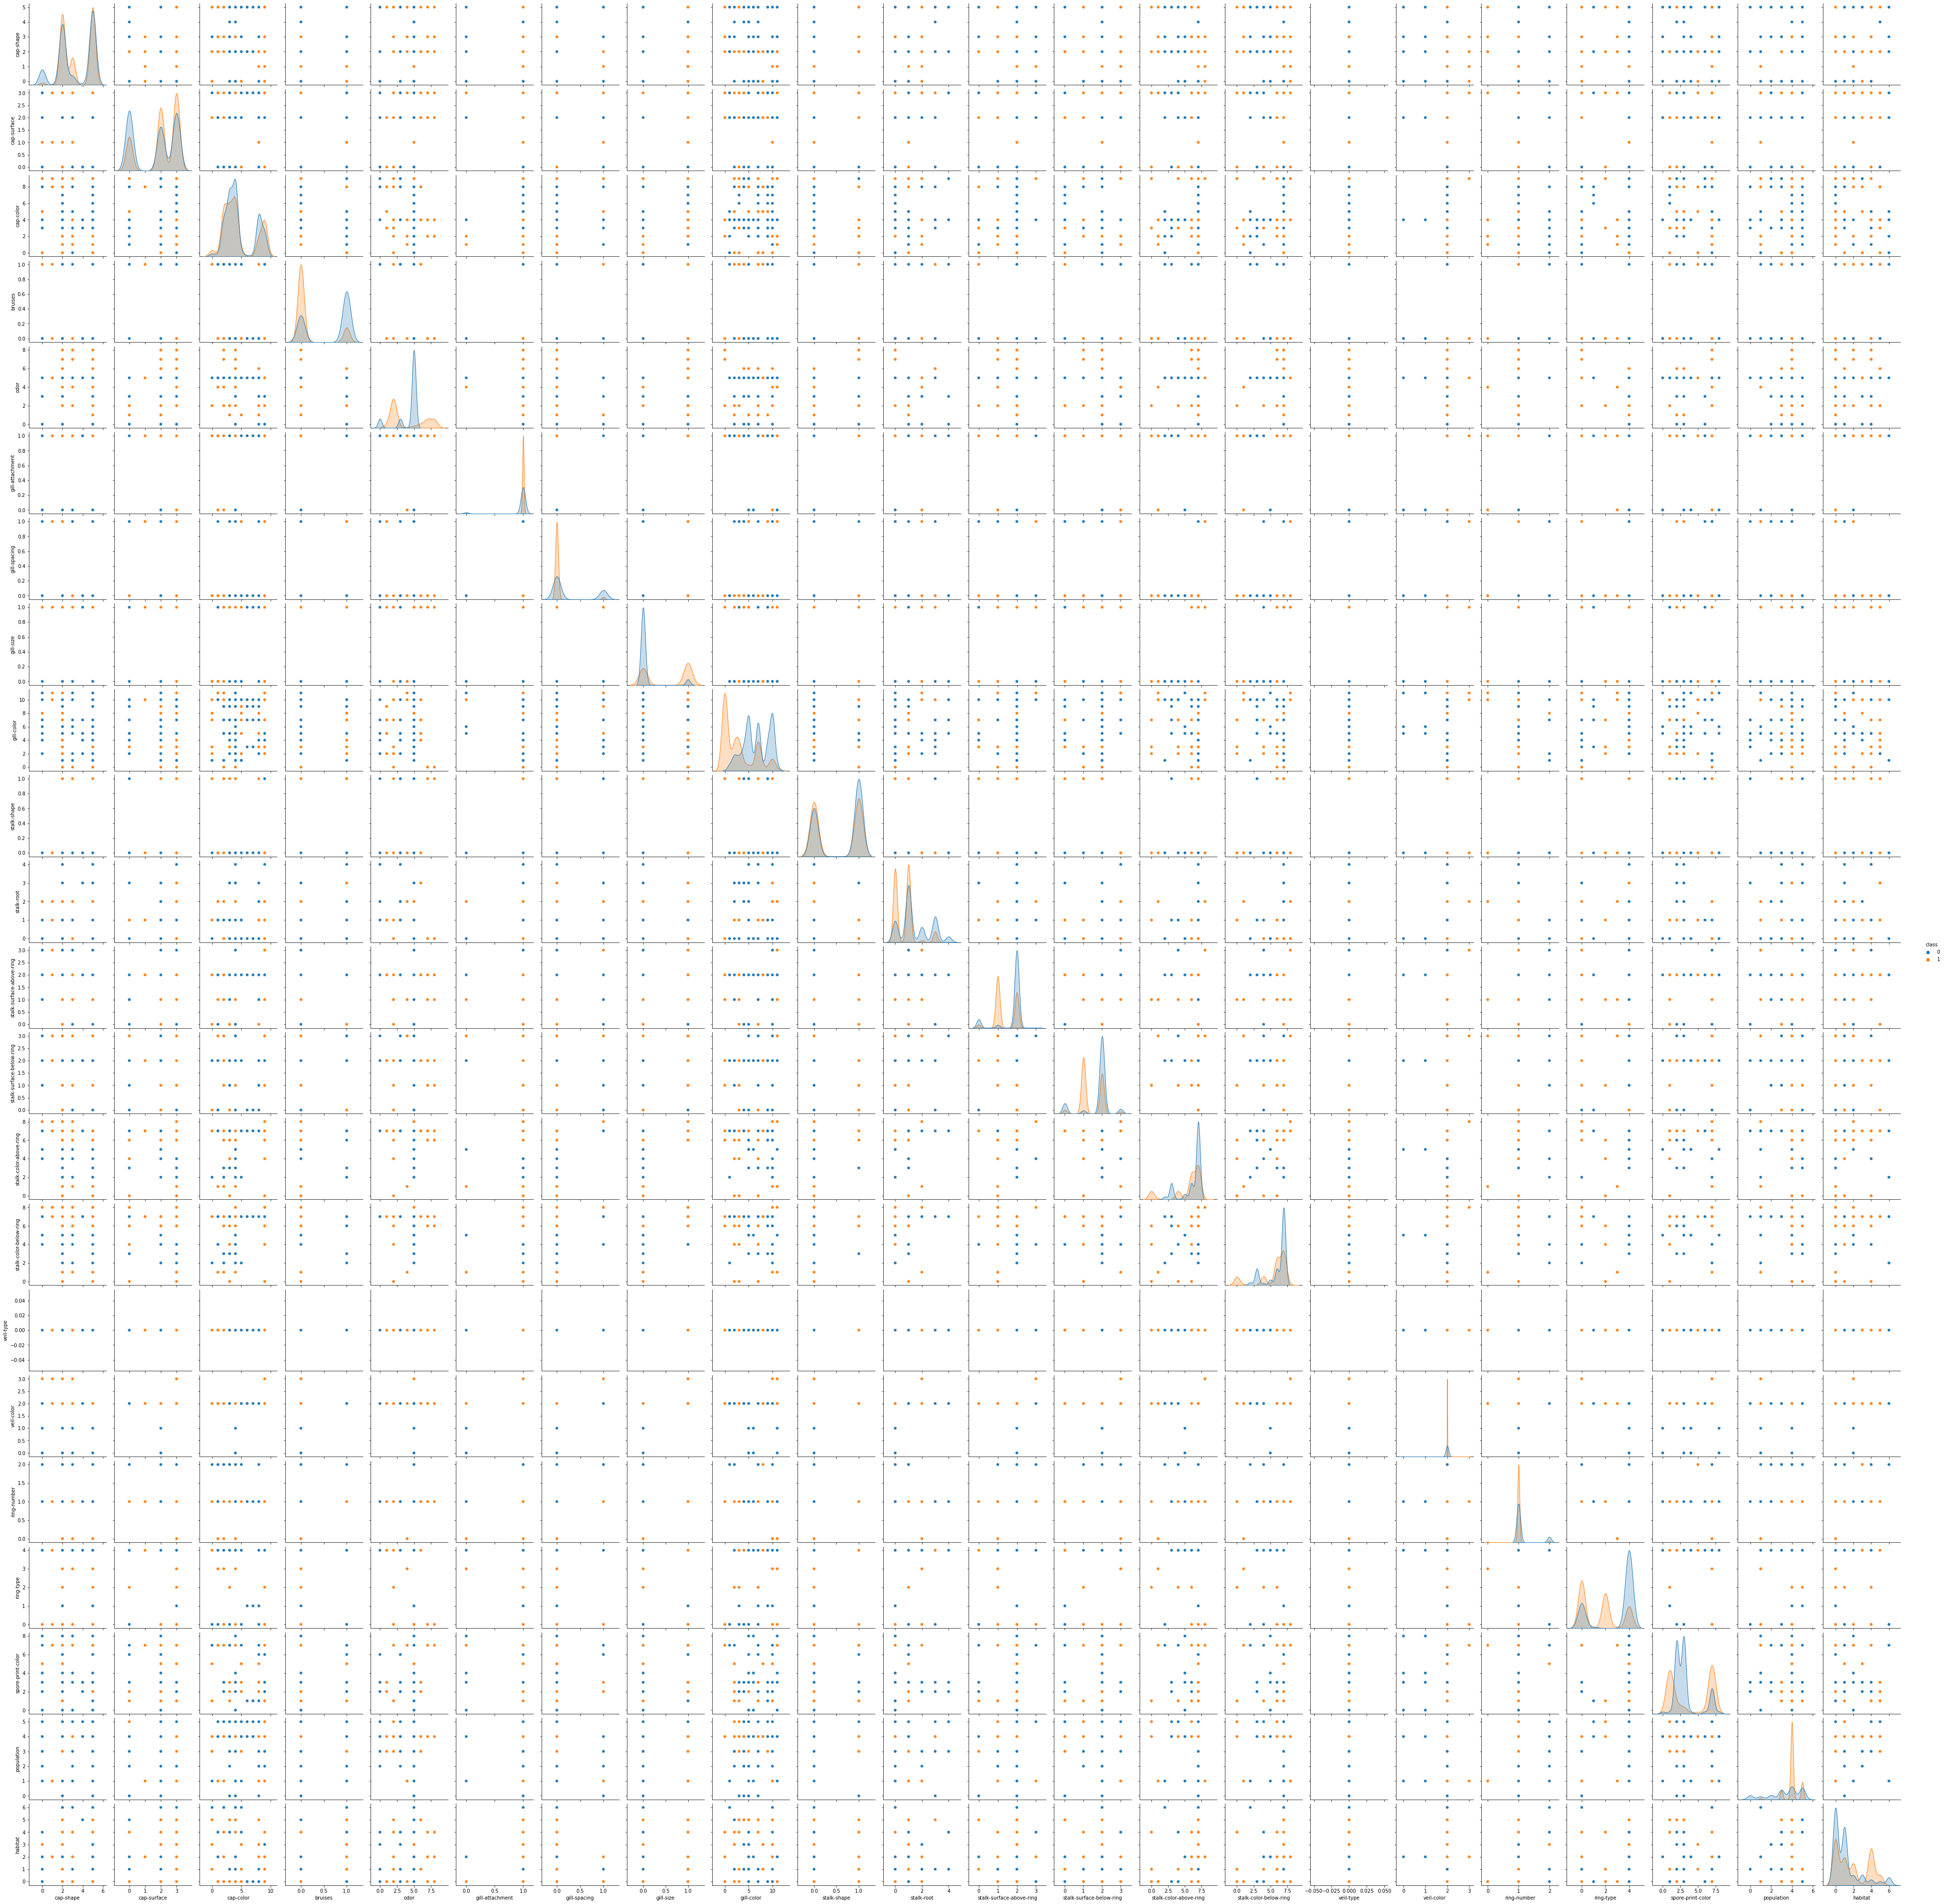

In [5]:
import seaborn as sns

sns.pairplot(df, hue='class')


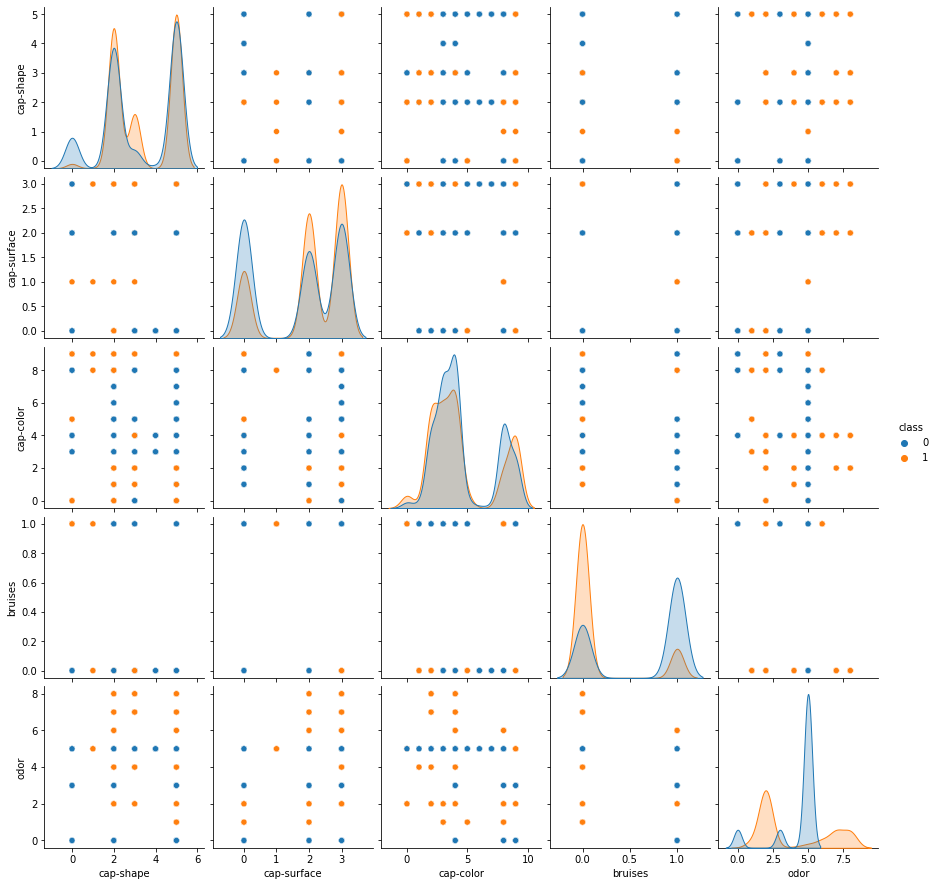

In [20]:
sns.pairplot(data=df, hue='class', vars=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor'])
plt.show()

In [26]:
# Разделение данных на две выборки по классу
edible_mushrooms = df[df["class"] == 0]
poisonous_mushrooms = df[df["class"] == 1]

In [27]:
# Матрица корреляций для всей выборки
corr_all = df.corr()

# Матрица корреляций для съедобных грибов
corr_edible = edible_mushrooms.corr()

# Матрица корреляций для ядовитых грибов
corr_poisonous = poisonous_mushrooms.corr()

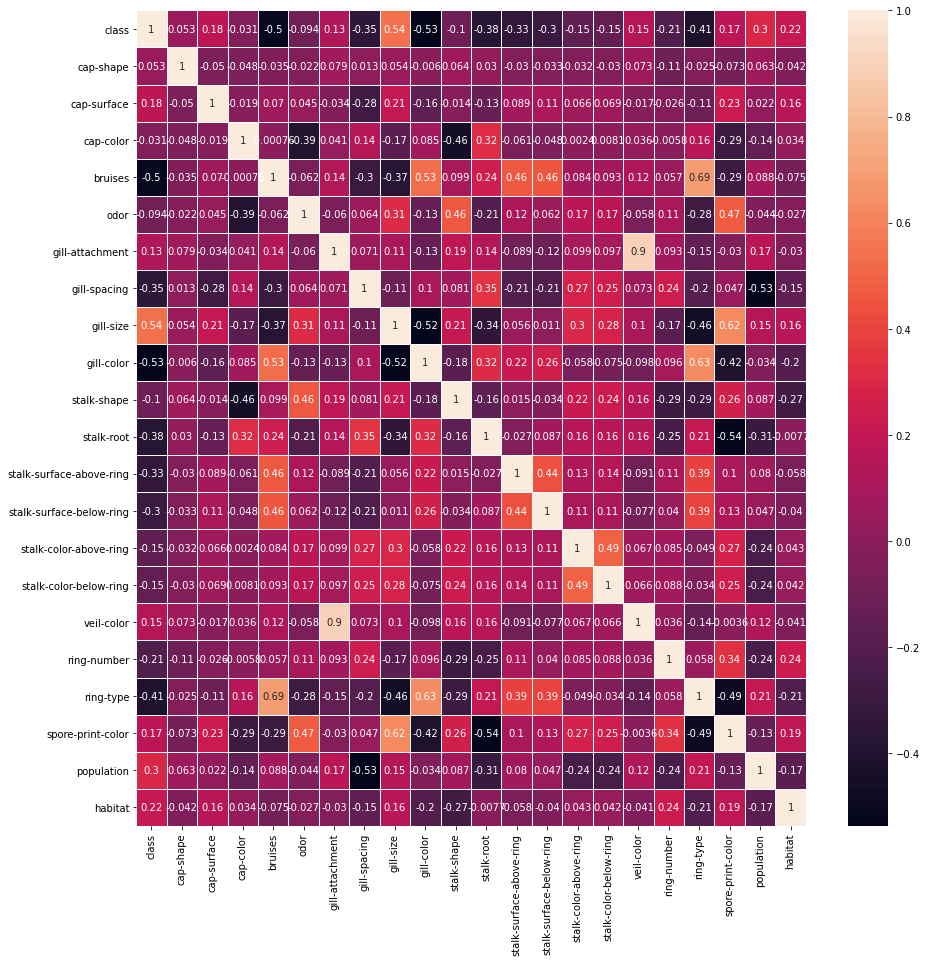

In [28]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_all, annot=True, linewidths=.5, ax=ax)
plt.show()

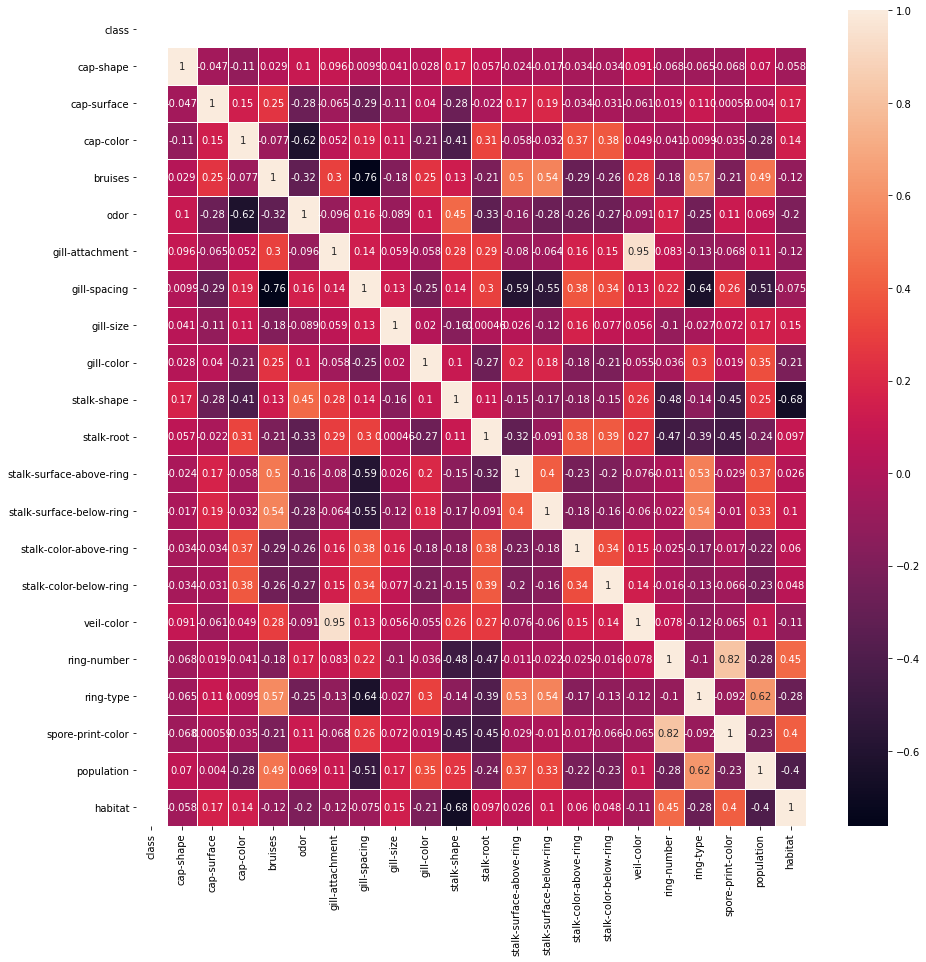

In [29]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_edible, annot=True, linewidths=.5, ax=ax)
plt.show()

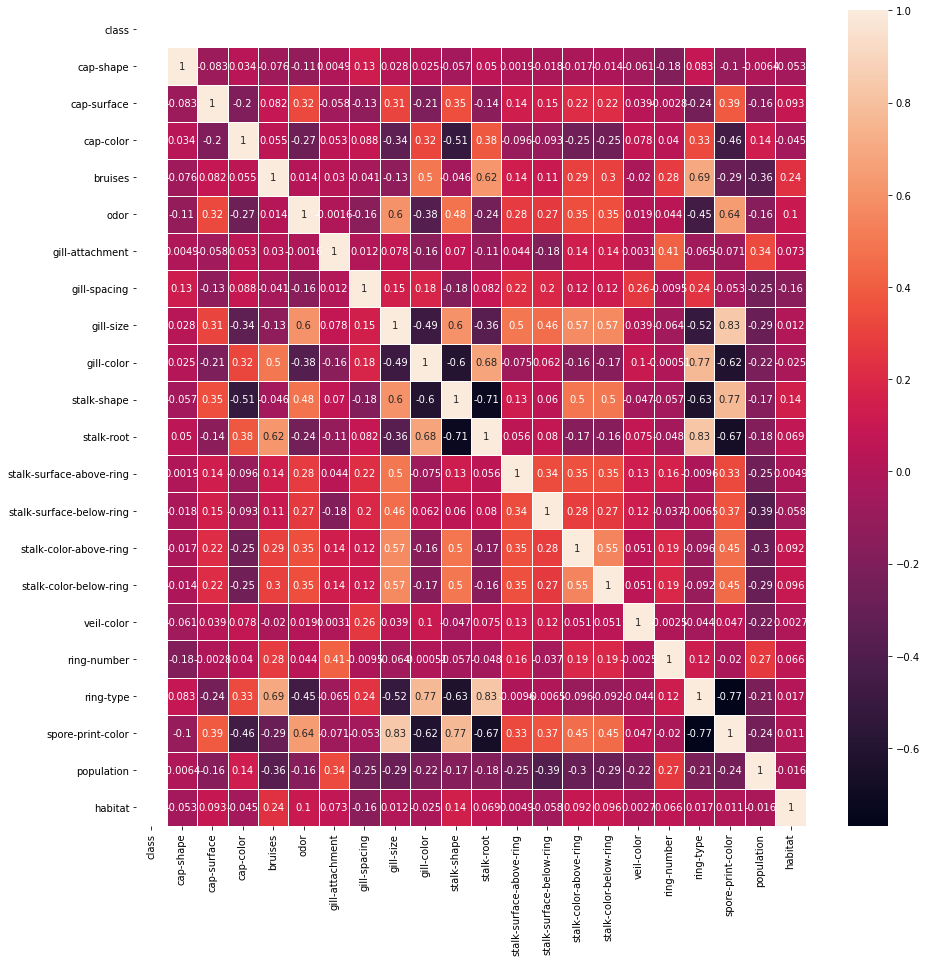

In [30]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_poisonous, annot=True, linewidths=.5, ax=ax)
plt.show()

Далее мы определим наши функции для prior и likelihood для вычисления posterior и взвешивания по каждой из целевых переменных, чтобы увидеть, какая точка данных подходит к тому или иному месту.

Разделим набор данных на обучающую и тестовую выборку

In [31]:
X = df.drop(columns = ['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (5686, 21)
y_train =  (5686,)
X_test =  (2438, 21)
y_test =  (2438,)


Сначала мы вычисляем априорную вероятность, которая представляет собой процент точек данных, принадлежащих указанному классу.

Например, если наш обучающий набор данных содержит 60% съедобных грибов, то при расчете на контрольной выборке aприорная вероятность будет равна 0,6.

In [32]:
def prior(y_train, label):
    
    total_points = y_train.shape[0]
    class_points = np.sum(y_train == label)
    
    return class_points/float(total_points)

Далее мы определим функцию для вычисления условной вероятности, которую затем будем использовать для вычисления likelihood

In [33]:
def cond_prob(X_train, y_train, feat_col, feat_val, label):
    """
    In this function, we will calculate the conditional probability which will be used to calculate likelihood.
    The value it returns is of the form 
        P(x_i | y = C)
    which is the probability of the current feature (given by feat_col x_i) having the current value (given by feat_val)
    given that it belongs to the target class C
    
    Effectively, it reduces to the form
        all points belongig to class C which have the given value for the feature column / all points belonging to class C
    """
    
    # Getting all the 
    X_filtered = X_train[y_train == label]
    
    numerator = np.sum(X_filtered[feat_col] == feat_val)
    denominator = np.sum(y_train == label)
    
    return numerator/float(denominator)

Теперь время вычислить апостериорную вероятность и сделать предсказания


In [34]:
def predict(X_train, y_train, xtest):
    
    # Get the number of target classes
    classes = np.unique(y_train)
    
    # All the features for our dataset
    features = [x for x in X_train.columns]
    
    
    # Compute posterior probabilites for each class
    post_probs = []
    
    for label in classes:
        
        # Since, posterior = prior * likelihood
        # We'll calculate likelihood by calculating the product of the conditional probabilities for each of the features
        
        likelihood = 1.0
        
        for f in features:
            cond = cond_prob(X_train, y_train, f, xtest[f], label)
            likelihood *= cond
        
        prior_prob = prior(y_train, label)
        
        posterior = prior_prob * likelihood
        
        post_probs.append(posterior)
        
    # Return the label for which the posterior probability was the maximum
    prediction = np.argmax(post_probs)
    
    return prediction    

In [35]:
# First, let's check on a random example

rand_example = 4

output = predict(X_train, y_train, X_test.iloc[rand_example])

print("Naive Bayes Classifier predicts ", output)
print("Current Answer ", y_test.iloc[rand_example])

Naive Bayes Classifier predicts  0
Current Answer  0


Теперь мы проверим результаты на каждой из тестовых точек данных и рассчитаем оценку точности для нашего классификатора

In [54]:
def accuracy_score1(X_train, y_train, xtest, ytest):
    
    preds = []
    
    for i in range(xtest.shape[0]):
        pred_label = predict(X_train, y_train, xtest.iloc[i])
        preds.append(pred_label)
        
    preds = np.array(preds)
    
    accuracy = np.sum(preds == ytest)/ytest.shape[0]
    
    return accuracy

In [55]:
print("Accuracy: {:.3f}".format(accuracy_score1(X_train, y_train, X_test, y_test)))

Accuracy: 0.995


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get predicted labels for the test set
y_pred = [predict(X_train, y_train, x) for _, x in X_test.iterrows()]

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print('Confusion matrix:\n', confusion_matrix)
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))



Confusion matrix:
 [[1270    7]
 [   6 1155]]
Precision: 0.995
Recall: 0.995
F1 score: 0.995
